## Introduction

The purpose of this report is to carry out an analysis to identify patterns that determine whether a game will succeed or not and spot potential big winners and help plan advertising campaigns.

In the report hereinafter, I will study the data provided by Ice, an online store, which sells video games all over the world, User and expert reviews, genres, platforms (e.g. Xbox or PlayStation) and historical data on game sales that is available from open sources. The data in the data frame goes back to 2016.

To complete the analysis I will fix problematic values in the data, fill in missing values, add columns to the data set and remove duplicated rows, as required. Once the data frame is preprocessed and clean, I will calculate each platform's total sales generated each year. Then, I will consider whether to examine if there are outliers in the data frame, remove them as I deem necessary, and add a column containing each platform's decade of active sales. Then, I will draw conclusions in regards to platforms' average life, peak sales and average user ratings of specific platforms and specific genres. 

## Description of the Data

Before I begin the analysis of the data frame, I will describe the data frame provided for the analysis in this report. There is one data frame with the following columns:  
 
 - Name - the name of the game.
 - Platform - the platform for which the game was released, one game may be released on several platforms.
 - Year_of_Release - the year the game was release for the specific platform. It should be noted the data for 2016 may be incomplete.
 - Genre - the game's genre.
 - NA_sales - North American sales in millions of USD.
 - EU_sales - sales in Europe in millions of USD.
 - JP_sales - sales in Japan in millions of USD.
 - Other_sales - sales in other countries in millions of USD. 
 - Critic_Score - the critic score each game received. The maximum score is 100.
 - User_Score - the critic score each game received. The maximum score is 10.
 - Rating - the Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature. It should be noted that some ratings that were used in the past, are currently not in use. 



## Loading and Initial Exploration of the Data

### Initialization

In [1]:
import random
import math as mt
import matplotlib
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy import stats
from random import sample
from functools import reduce
from scipy import stats as st
from scipy.stats import levene
import matplotlib.pyplot as plt
from itertools import chain,cycle
from IPython.display import display_html


Hereinafter I will define a function that will help me display tables and graphs side by side, as required. 

In [2]:
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:left"><td style="vertical-align:left">'
        html_str+=f'<h1>{title}</h1>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

### Loading of Data

Hereinafter I will load data frame and name it. 

In [3]:
games = pd.read_csv('///Users/doronerlich/Desktop/Code ME/Integrated Project 1/games.csv')

### Data Exploration

Now that the data was loaded, I will explore the data frame which I named "games". 

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


As we can see, there 16715 rows in the data frame and 11 columns (as detailed in the introduction of this report). 
It should be noted that there are missing values in the name, year of release, genre, critic score, user score and rating columns. Also, the values in the year of release and user score column are incorrect. 

Hereinafter I will print a few random rows of the data frame. 

In [5]:
games.sample(10)

Name Platform  Year_of_Release  \
4097         Secret Weapons Over Normandy      PS2           2003.0   
1214       Active Life: Outdoor Challenge      Wii           2008.0   
2738       Raving Rabbids: Travel in Time      Wii           2010.0   
5498                        Clock Tower 3      PS2           2002.0   
4220                         Circus Atari     2600              NaN   
385                      Monster Hunter 4      3DS           2013.0   
5267                           LocoRoco 2      PSP           2008.0   
9902    Marvel Avengers: Battle for Earth     WiiU           2012.0   
15807  Horrid Henry: Missions of Mischief      Wii           2010.0   
3981             Rooms: The Main Building       DS           2010.0   

              Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
4097     Simulation      0.24      0.18      0.00         0.06          81.0   
1214         Sports      0.78      0.43      0.19         0.14          69.0   
2738      Adventure      0.21      0.46      0.00         0.08          62.0   
5498      Adventure      0.10      0.08      0.12         0.03          69.0   
4220         Action      0.43      0.03      0.00         0.00           NaN   
385    Role-Playing      0.00      0.00      3.44         0.00           NaN   
5267       Platform      0.21      0.09      0.01         0.04          85.0   
9902         Action      0.06      0.04      0.00         0.01          50.0   
15807     Adventure      0.00      0.01      0.00         0.00           NaN   
3981      Adventure      0.10      0.34      0.01         0.05          56.0   

      User_Score Rating  
4097         8.2      T  
1214         8.1      E  
2738         7.6   E10+  
5498         7.6      M  
4220         NaN    NaN  
385          NaN    NaN  
5267         8.4      E  
9902           5      T  
15807        NaN      E  
3981         tbd      E

In [6]:
display(games.describe())
display(games.describe(include='object'))

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Name Platform   Genre User_Score Rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990

From the information above, we can see that games were released between 1980-2016. However, 75% of games were released after 2003. 
There are 31 different platforms in the data frame and 12 genres. Also, there is the value "tbd" in the user score column - to be determined. 

In [7]:
games[games.User_Score=='tbd']['Year_of_Release'].value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: Year_of_Release, dtype: int64

There are 2424 "tbd" values in the user column, I will decide in the preprocessing section how to deal with this value. 

I checked the distribution of the "tbd" value across years of release, to see if it's contained only to 2016. it does not, actually the lion's share is between the years 2002-2011. 

In [8]:
for i in games:
    if games[i].isnull().sum()>0:
        print(i)

Name
Year_of_Release
Genre
Critic_Score
User_Score
Rating


As noted above, there are 6 columns with missing values. Hereinafter, I will explore the distribution of the null values. 

In [9]:
print(games['Name'].isnull().value_counts())
print()
print(games['Year_of_Release'].isnull().value_counts())
print()
print(games['Genre'].isnull().value_counts())
print()
print(games['Critic_Score'].isnull().value_counts())
print()
print(games['User_Score'].isnull().value_counts())
print()
print(games['Rating'].isnull().value_counts())

False    16713
True         2
Name: Name, dtype: int64

False    16446
True       269
Name: Year_of_Release, dtype: int64

False    16713
True         2
Name: Genre, dtype: int64

True     8578
False    8137
Name: Critic_Score, dtype: int64

False    10014
True      6701
Name: User_Score, dtype: int64

False    9949
True     6766
Name: Rating, dtype: int64


In [10]:
games.isnull().sum()/ games.shape[0] * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In the name and genre column there are only 2 missing values, they consist of less than 1%. 
In the year of release column 269 values are missing, they consist of less than 2%. 
The lion's share of missing values are in the critic score, user score and rating columns:
- In critic score, more than 50% of the values are missing (8578 values).
- In user score, more than 40% of the values are missing (6701 values).
- In rating, more than 40% of the values are missing (6766 values).

In [11]:
def exploration(data):
    for i in data:
        print("Unique values of '{}' column:\n\n{}\n\nValue counts of '{}' column:\n\n{}\n\n-----------\n".format(
        i, data[i].unique(), i, data[i].value_counts()))

In [12]:
exploration(games)

Unique values of 'Name' column:

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']

Value counts of 'Name' column:

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

-----------

Unique values of 'Platform' column:

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'P

Above, I explored a few columns in the data frame and the distribution of their values. 

### Conclusions and Further Steps

In summation, we have 16715 rows and 11 columns and found the following:
 - two columns have incorrect data types - year of release is a float when it should be an int and user score should be a float but it's an object. 
 - The name and genre column have 2 missing values each.
 - The year of release column has 269 values missing.
 - The critic score column, has more than 50% of the values are missing (8578 values).
 - The user score column, has more than 40% of the values are missing (6701 values) and more than 2000 "tbd" values that are distributed across several years (most not recently), these may also be considered null values.
 - The rating column, has more than 40% of the values are missing (6766 values).
 
In the data preprocessing I will address the following:
 - I will correct the data types, it is possible that only one might be fixed at early stage and the other in a later stage since there are missing values in the columns. 
 - I will fill in the missing values as much as possible, while making sure that the data is not distorted and no anomalies created. I will consider living values null, especially taking into account that some columns have almost half of the values missing, if not more. 
 - I will check if there are duplicate rows in the data frame. If located - I will delete them. 
 - I will add a column with the total sales generated by each game in all all regions: North America, Europe, Japan and Other regions. 
 - I will consider doing a categorization of the data to simplify the studying of the data. 

## Preprocessing the Data

### Turning the Columns' Names to Lowercase

In [13]:
games.columns = games.columns.str.strip().str.lower()

In [14]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Converting Data Types in the Data Frame

In [15]:
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Looking at the columns' data types, it seems that two columns are in incorrect data types - year of release is a float when it should be int and user score should be float instead of object. 

In [16]:
games['user_score'] = pd.to_numeric(games['user_score'],errors='coerce')

In the cells above I converted the data types of the values in the two columns. In the year of release column, converting to "int" produces an error since there are still null values in the column. If necessary, I will fix the column's data type once I fix the missing values. 

In [17]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


I rechecked the data types to confirm that the data types were converted correctly. 

### Treating Missing Values in the Data Frame

Explain why you filled in the missing values as you did or why you decided to leave them blank.
Why do you think the values are missing? Give possible reasons.
Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

Describe the columns where the data types have been changed and why.

As noted in data exploration section above, there are six columns in the data frame with missing values:

 - The name column;
 - The genre column;
 - The year_of_release column;
 - The critic_score column;
 - The user_score column;
 - The rating column.
 
Hereinafter I will address each column and either fill in the missing values, leave them as they are or delete rows containing them. 

#### Checking for Symmetrical Missing Values

In [18]:
games_subset = games[(games['year_of_release'].isnull())&(games['critic_score'].isnull())&(games['user_score'].isnull())&(games['rating'].isnull())]
games_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 475 to 16458
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             85 non-null     object 
 1   platform         85 non-null     object 
 2   year_of_release  0 non-null      float64
 3   genre            85 non-null     object 
 4   na_sales         85 non-null     float64
 5   eu_sales         85 non-null     float64
 6   jp_sales         85 non-null     float64
 7   other_sales      85 non-null     float64
 8   critic_score     0 non-null      float64
 9   user_score       0 non-null      float64
 10  rating           0 non-null      object 
dtypes: float64(7), object(4)
memory usage: 8.0+ KB


Above, I checked whether there are symmetrical missing values in the data frame. There are 85 rows where there are missing values in 4 columns. 

In [19]:
games_subset.describe(include='all').fillna('N/A').T

count unique             top freq      mean       std  min  \
name               85     83  Happy Feet Two    3       N/A       N/A  N/A   
platform           85     14            2600   17       N/A       N/A  N/A   
year_of_release   0.0    N/A             N/A  N/A       N/A       N/A  N/A   
genre              85     12          Action   20       N/A       N/A  N/A   
na_sales         85.0    N/A             N/A  N/A  0.174588  0.377733  0.0   
eu_sales         85.0    N/A             N/A  N/A  0.040471  0.133737  0.0   
jp_sales         85.0    N/A             N/A  N/A  0.060941  0.131281  0.0   
other_sales      85.0    N/A             N/A  N/A  0.012706  0.049266  0.0   
critic_score      0.0    N/A             N/A  N/A       N/A       N/A  N/A   
user_score        0.0    N/A             N/A  N/A       N/A       N/A  N/A   
rating              0      0             N/A  N/A       N/A       N/A  N/A   

                 25%   50%   75%   max  
name             N/A   N/A   N/A   N/A  
platform         N/A   N/A   N/A   N/A  
year_of_release  N/A   N/A   N/A   N/A  
genre            N/A   N/A   N/A   N/A  
na_sales         0.0  0.01  0.16  2.36  
eu_sales         0.0   0.0  0.02  1.02  
jp_sales         0.0   0.0  0.06  0.77  
other_sales      0.0   0.0  0.01  0.41  
critic_score     N/A   N/A   N/A   N/A  
user_score       N/A   N/A   N/A   N/A  
rating           N/A   N/A   N/A   N/A

It does not seems like there is a pattern to the symmetry in these rows - they are across 14 platform types (though platform 2600 is the most frequent), 83 different games and 12 genres. 

In [20]:
games_subset.head()

name platform  year_of_release      genre  \
475   wwe Smackdown vs. Raw 2006      PS2              NaN   Fighting   
609               Space Invaders     2600              NaN    Shooter   
1301              Triple Play 99       PS              NaN     Sports   
1506                   Adventure     2600              NaN  Adventure   
1585                      Combat     2600              NaN     Action   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
475       1.57      1.02       0.0         0.41           NaN         NaN   
609       2.36      0.14       0.0         0.03           NaN         NaN   
1301      0.81      0.55       0.0         0.10           NaN         NaN   
1506      1.21      0.08       0.0         0.01           NaN         NaN   
1585      1.17      0.07       0.0         0.01           NaN         NaN   

     rating  
475     NaN  
609     NaN  
1301    NaN  
1506    NaN  
1585    NaN

In [21]:
len(games_subset)/len(games)

0.00508525276697577

After printing a sample of the rows with symmetric missing values and checking their percentage, and once I concluded that there is no apparent pattern - I decided to deal with these missing values as if they are not symmetric. 

#### The "Name" and "Genre" Column

Both the name column and the genre column are missing two values each.

In [22]:
games[(games['name'].isnull())&(games['genre'].isnull())]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN

I checked, and the missing values in the columns are symmetric, both games' platform is "GEN".

In [23]:
len(games.loc[games['platform']=='GEN'])

29

In [24]:
len(games.loc[games['name'].isnull()])/len(games.loc[games['platform']=='GEN'])

0.06896551724137931

There are 29 games on the "GEN" platform in the data frame and the rows with the missing values consist less than 1% of the rows of that platform. 

In [25]:
games = games.dropna(subset=['name'], how='all')

In [26]:
games.loc[games['genre'].isnull()]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

Since I have no information available in the data frame that can assist in filling in those missing values, I decided to remove them. I checked if there are any missing values in the genre column - there are none. 

In [27]:
for i in games:
    if games[i].isnull().sum()>0:
        print(i)

year_of_release
critic_score
user_score
rating


I checked which columns still have missing values - there are still four columns with missing values, the name and genre columns don't have missing values. 

#### The "Year_of_Release" Column

In [28]:
games.loc[games['year_of_release'].isnull()]

name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16373        Sports      0.01      0.00      0.00         0.00          43.0   
16405        Racing      0.01      0.00      0.00         0.00          69.0   
16448       Shooter      0.01      0.00      0.00         0.00          59.0   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

       user_score rating  
183           8.5      E  
377           6.4      E  
456           7.9   E10+  
475           NaN    NaN  
609           NaN    NaN  
...           ...    ...  
16373         NaN   E10+  
16405         6.5      T  
16448         6.7      M  
16458         NaN    NaN  
16522         5.5      T  

[269 rows x 11 columns]

There are 269 missing values in the year of release column.

In [29]:
games['new_year'] = games['year_of_release'].fillna(games.groupby(['name'])['year_of_release'].transform('median'))  

I created a new column called "new_year" and filled it with the median of the year of release column grouped by the games' names. 

In [30]:
games.loc[games['year_of_release'].isnull()]

name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16373        Sports      0.01      0.00      0.00         0.00          43.0   
16405        Racing      0.01      0.00      0.00         0.00          69.0   
16448       Shooter      0.01      0.00      0.00         0.00          59.0   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

       user_score rating  new_year  
183           8.5      E    2003.0  
377           6.4      E    2003.0  
456           7.9   E10+    2008.0  
475           NaN    NaN       NaN  
609           NaN    NaN    1999.0  
...           ...    ...       ...  
16373         NaN   E10+    2008.0  
16405         6.5      T    2003.0  
16448         6.7      M    2012.0  
16458         NaN    NaN       NaN  
16522         5.5      T       NaN  

[269 rows x 12 columns]

I checked the data frame with the additional column. Next, since there are some games that were released several times for different platforms, I checked several games and the year filled in the new column compared with the year in the original column. 

In [31]:
games.loc[games['name']=='Madden NFL 2004']

name platform  year_of_release   genre  na_sales  eu_sales  \
183   Madden NFL 2004      PS2              NaN  Sports      4.26      0.26   
1881  Madden NFL 2004       XB           2003.0  Sports      1.02      0.02   
3889  Madden NFL 2004       GC           2003.0  Sports      0.40      0.10   
5708  Madden NFL 2004      GBA           2003.0  Sports      0.22      0.08   

      jp_sales  other_sales  critic_score  user_score rating  new_year  
183       0.01         0.71          94.0         8.5      E    2003.0  
1881      0.00         0.05          92.0         8.3      E    2003.0  
3889      0.00         0.01          94.0         7.7      E    2003.0  
5708      0.00         0.01          70.0         6.6      E    2003.0

In [32]:
games.loc[games['name']=='Madden NFL 13']

name platform  year_of_release   genre  na_sales  eu_sales  \
507    Madden NFL 13     X360           2012.0  Sports      2.53      0.15   
604    Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
3986   Madden NFL 13      Wii           2012.0  Sports      0.47      0.00   
5887   Madden NFL 13      PSV           2012.0  Sports      0.28      0.00   
7066   Madden NFL 13     WiiU           2012.0  Sports      0.21      0.00   
16230  Madden NFL 13      PS3           2012.0  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  new_year  
507         0.0         0.17          81.0         5.8      E    2012.0  
604         0.0         0.23          83.0         5.5      E    2012.0  
3986        0.0         0.03           NaN         7.3      E    2012.0  
5887        0.0         0.02          63.0         7.3      E    2012.0  
7066        0.0         0.02          75.0         6.7      E    2012.0  
16230       0.0         0.00          83.0         5.5      E    2012.0

While checking, I came across a duplicate row for game "Madden NFL 13" for platform PS3. 

In [33]:
games = games.drop(16230)

In [34]:
games.loc[games['name']=='Madden NFL 13']

name platform  year_of_release   genre  na_sales  eu_sales  \
507   Madden NFL 13     X360           2012.0  Sports      2.53      0.15   
604   Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
3986  Madden NFL 13      Wii           2012.0  Sports      0.47      0.00   
5887  Madden NFL 13      PSV           2012.0  Sports      0.28      0.00   
7066  Madden NFL 13     WiiU           2012.0  Sports      0.21      0.00   

      jp_sales  other_sales  critic_score  user_score rating  new_year  
507        0.0         0.17          81.0         5.8      E    2012.0  
604        0.0         0.23          83.0         5.5      E    2012.0  
3986       0.0         0.03           NaN         7.3      E    2012.0  
5887       0.0         0.02          63.0         7.3      E    2012.0  
7066       0.0         0.02          75.0         6.7      E    2012.0

Since the duplicate row was identical except for the sales generated, I deleted the row that generated the least amount of sales. I checked that the row was indeed dropped. 

In [35]:
games.loc[games['name']=='LEGO Batman: The Videogame']

name platform  year_of_release   genre  na_sales  \
397    LEGO Batman: The Videogame     X360           2008.0  Action      2.04   
456    LEGO Batman: The Videogame      Wii              NaN  Action      1.80   
460    LEGO Batman: The Videogame       DS           2008.0  Action      1.75   
1519   LEGO Batman: The Videogame      PS3           2008.0  Action      0.72   
1538   LEGO Batman: The Videogame      PSP              NaN  Action      0.57   
1553   LEGO Batman: The Videogame      PS2           2008.0  Action      0.72   
12465  LEGO Batman: The Videogame       PC           2008.0  Action      0.02   

       eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
397        1.02       0.0         0.32          76.0         7.9   E10+   
456        0.97       0.0         0.29          74.0         7.9   E10+   
460        1.01       0.0         0.29          72.0         8.0   E10+   
1519       0.39       0.0         0.19          75.0         7.7   E10+   
1538       0.44       0.0         0.27          73.0         7.4   E10+   
1553       0.03       0.0         0.52          77.0         8.9   E10+   
12465      0.03       0.0         0.01          80.0         7.8   E10+   

       new_year  
397      2008.0  
456      2008.0  
460      2008.0  
1519     2008.0  
1538     2008.0  
1553     2008.0  
12465    2008.0

In [36]:
games.loc[games['name']=='Brothers in Arms: Furious 4']

name platform  year_of_release    genre  \
12185  Brothers in Arms: Furious 4      PS3           2012.0  Shooter   
16329  Brothers in Arms: Furious 4     X360              NaN  Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
12185      0.01      0.05       0.0         0.01           NaN         NaN   
16329      0.01      0.00       0.0         0.00           NaN         NaN   

      rating  new_year  
12185      M    2012.0  
16329      M    2012.0

In [37]:
games.loc[games['name']=='Test Drive Unlimited 2'] 

name platform  year_of_release   genre  na_sales  \
2969  Test Drive Unlimited 2     X360              NaN  Racing      0.30   
3233  Test Drive Unlimited 2      PS3              NaN  Racing      0.16   
7735  Test Drive Unlimited 2       PC              NaN  Racing      0.05   

      eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
2969      0.31      0.00         0.07          68.0         6.4      T   
3233      0.34      0.01         0.12          70.0         6.1      T   
7735      0.11      0.00         0.03          72.0         5.7      T   

      new_year  
2969       NaN  
3233       NaN  
7735       NaN

In [38]:
len(games)-len(games.loc[games['new_year'].notnull()])

146

In [39]:
len(games.loc[games['new_year'].isnull()])/len(games)

0.008736237434179034

I checked how many null values remained in the new year column. There are still 146 missing values and they consist of an extremely small percentage of the whole data frame. 

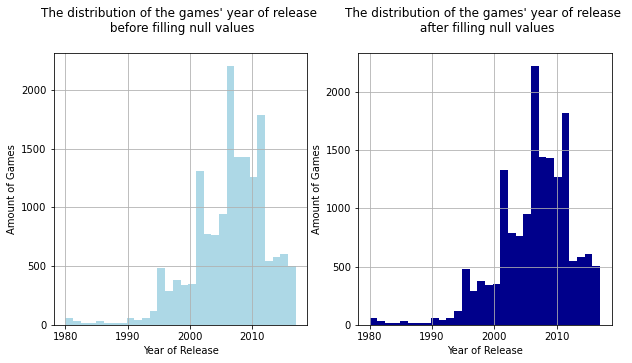

count         mean        std     min     25%      50%  \
year_of_release  16443.0  2006.485921   5.875546  1980.0  2003.0  2007.00   
na_sales         16712.0     0.263318   0.813587     0.0     0.0     0.08   
eu_sales         16712.0     0.145053   0.503373     0.0     0.0     0.02   
jp_sales         16712.0     0.077629   0.308880     0.0     0.0     0.00   
other_sales      16712.0     0.047346   0.186747     0.0     0.0     0.01   
critic_score      8136.0    68.965954  13.938153    13.0    60.0    71.00   
user_score        7589.0     7.125260   1.499989     0.0     6.4     7.50   
new_year         16566.0  2006.490070   5.862658  1980.0  2003.0  2007.00   

                     75%      max  
year_of_release  2010.00  2016.00  
na_sales            0.24    41.36  
eu_sales            0.11    28.96  
jp_sales            0.04    10.22  
other_sales         0.03    10.57  
critic_score       79.00    98.00  
user_score          8.20     9.70  
new_year         2010.00  2016.00

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plot_range = (1980, 2017)

# first plot: the histogram:
axs[0].hist(x = games['year_of_release'], range = plot_range,bins = 30, color='lightblue')
axs[0].grid()
# the title:
axs[0].set_title("The distribution of the games' year of release \n before filling null values\n")
# axis labels:
axs[0].set_xlabel("Year of Release")
axs[0].set_ylabel('Amount of Games')

# second plot: the histogram:
axs[1].hist(x = games['new_year'], range = plot_range,bins = 30, color='darkblue')
axs[1].grid()
# the title:
axs[1].set_title("The distribution of the games' year of release \n after filling null values\n")
# axis labels:
axs[1].set_xlabel("Year of Release")
axs[1].set_ylabel('Amount of Games')

plt.show()
games.describe().fillna('N/A').T

I checked the distribution of the games' year of release before and after the filling of the missing values - no anomalies were created. 

In [41]:
games['year_of_release']=games['new_year']

In [42]:
games = games.drop('new_year', 1)

/var/folders/zk/dmfz7khd1d7527x4jk58bf6r0000gn/T/ipykernel_92090/3483642414.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  games = games.drop('new_year', 1)


In [43]:
games = games.dropna(subset=['year_of_release'], how='all')

In [44]:
games.loc[games['year_of_release'].isnull()]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

I inserted the values I filled in the new column to the original column, deleted the extra column and since I have no way to fill in the rest of the missing values in the column (and considering their overall low percentage) - I deleted the rows with missing values in the year of release column. 

Then, I checked if there are any more rows with missing values in that column - there are none. 

In [45]:
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN

I printed a sample of the data frame - the extra column was indeed deleted. 

In [46]:
games['year_of_release'] = games['year_of_release'].astype(int)

In [47]:
games.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Now that the missing values were removed, I converted the column's data type. 

In [48]:
for i in games:
    if games[i].isnull().sum()>0:
        print(i)

critic_score
user_score
rating


There are three more column with missing values. 

#### The "Critic_Score" Column

In [49]:
games.loc[games['critic_score'].isnull()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1         29.08      3.58      6.81         0.77           NaN         NaN   
4         11.27      8.89     10.22         1.00           NaN         NaN   
5         23.20      2.26      4.22         0.58           NaN         NaN   
9         26.93      0.63      0.28         0.47           NaN         NaN   
10         9.05     10.95      1.93         2.74           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[8492 rows x 11 columns]

In [50]:
len(games.loc[games['critic_score'].isnull()])/len(games)

0.5126162018592297

I located the missing values in the critic score column, there are 8492 missing values in the column and they consist of more than 50% of the data frame (which is extremely high).

In [51]:
games['critic_score_new'] = games['critic_score']

In [52]:
games['critic_score_new'].fillna(games.groupby(['name'])['critic_score'].transform('median'), inplace=True)  

In [53]:
games['critic_score_new'].fillna(games.groupby(['name','genre'])['critic_score'].transform('median'), inplace=True)  

I created an additional column called "critic_score_new" and filled in the missing values with the median of the critic score column grouped by name and then grouped by name and genre. 

In [54]:
null_critic = games.loc[games['critic_score_new'].isnull()]

In [55]:
len(null_critic)/len(games)

0.4546661837498491

In [56]:
null_critic.describe(include='all').fillna('N/A').T

count unique      top  freq         mean       std     min  \
name                7532   6392  FIFA 12     7          N/A       N/A     N/A   
platform            7532     31       DS  1335          N/A       N/A     N/A   
year_of_release   7532.0    N/A      N/A   N/A  2005.417552  7.070859  1980.0   
genre               7532     12   Action  1192          N/A       N/A     N/A   
na_sales          7532.0    N/A      N/A   N/A     0.174226  0.751158     0.0   
eu_sales          7532.0    N/A      N/A   N/A       0.0796  0.325917     0.0   
jp_sales          7532.0    N/A      N/A   N/A     0.106543  0.359141     0.0   
other_sales       7532.0    N/A      N/A   N/A     0.020612  0.086173     0.0   
critic_score         0.0    N/A      N/A   N/A          N/A       N/A     N/A   
user_score         235.0    N/A      N/A   N/A     6.648936  2.065681     0.0   
rating              1266      6        E   903          N/A       N/A     N/A   
critic_score_new     0.0    N/A      N/A   N/A          N/A       N/A     N/A   

                     25%     50%     75%     max  
name                 N/A     N/A     N/A     N/A  
platform             N/A     N/A     N/A     N/A  
year_of_release   2000.0  2008.0  2010.0  2016.0  
genre                N/A     N/A     N/A     N/A  
na_sales             0.0    0.01    0.12   29.08  
eu_sales             0.0     0.0    0.04   10.95  
jp_sales             0.0    0.01    0.07   10.22  
other_sales          0.0     0.0    0.01    2.74  
critic_score         N/A     N/A     N/A     N/A  
user_score          5.65     7.3     8.1     9.7  
rating               N/A     N/A     N/A     N/A  
critic_score_new     N/A     N/A     N/A     N/A

I checked the distribution of the remaining missing values. More than 45% of the values are still missing, across all platforms, genres and year of release in the data frame.

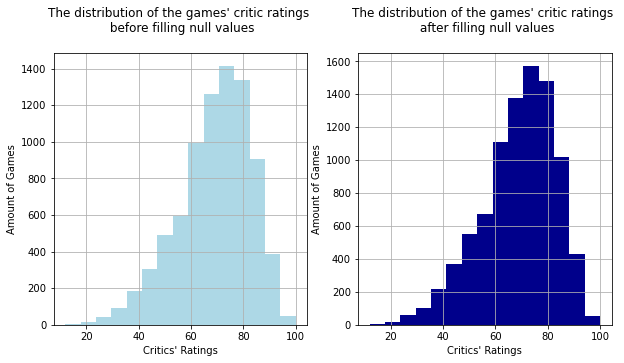

count         mean        std     min     25%      50%  \
year_of_release   16566.0  2006.489919   5.862700  1980.0  2003.0  2007.00   
na_sales          16566.0     0.263991   0.816496     0.0     0.0     0.08   
eu_sales          16566.0     0.145822   0.505378     0.0     0.0     0.02   
jp_sales          16566.0     0.078025   0.310077     0.0     0.0     0.00   
other_sales       16566.0     0.047570   0.187482     0.0     0.0     0.01   
critic_score       8074.0    68.990216  13.923373    13.0    60.0    71.00   
user_score         7539.0     7.125242   1.498237     0.0     6.4     7.50   
critic_score_new   9034.0    68.804793  14.112548    13.0    60.0    71.00   

                      75%      max  
year_of_release   2010.00  2016.00  
na_sales             0.24    41.36  
eu_sales             0.11    28.96  
jp_sales             0.04    10.22  
other_sales          0.03    10.57  
critic_score        79.00    98.00  
user_score           8.20     9.70  
critic_score_new    79.00    98.00

In [57]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plot_range = (12, 100)

# first plot: the histogram:
axs[0].hist(x = games['critic_score'], range = plot_range,bins = 15, color='lightblue')
axs[0].grid()
# the title:
axs[0].set_title("The distribution of the games' critic ratings \n before filling null values\n")
# axis labels:
axs[0].set_xlabel("Critics' Ratings")
axs[0].set_ylabel('Amount of Games')

# second plot: the histogram:
axs[1].hist(x = games['critic_score_new'], range = plot_range,bins = 15, color='darkblue')
axs[1].grid()
# the title:
axs[1].set_title("The distribution of the games' critic ratings \n after filling null values\n")
# axis labels:
axs[1].set_xlabel("Critics' Ratings")
axs[1].set_ylabel('Amount of Games')

plt.show()
games.describe().fillna('N/A').T

I compared the distribution of the values in the original critic score column and the additional column where the missing values were filled - no anomalies were created. 

However, since the percentage of the remaining missing values is extremely high and for the purpose of not distorting the data - I decided to leave them as null. 

In [58]:
games['critic_score'] = games['critic_score_new']

In [59]:
games = games.drop('critic_score_new', 1)

/var/folders/zk/dmfz7khd1d7527x4jk58bf6r0000gn/T/ipykernel_92090/2321165549.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  games = games.drop('critic_score_new', 1)


In [60]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16566 non-null  object 
 1   platform         16566 non-null  object 
 2   year_of_release  16566 non-null  int64  
 3   genre            16566 non-null  object 
 4   na_sales         16566 non-null  float64
 5   eu_sales         16566 non-null  float64
 6   jp_sales         16566 non-null  float64
 7   other_sales      16566 non-null  float64
 8   critic_score     9034 non-null   float64
 9   user_score       7539 non-null   float64
 10  rating           9867 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


I replaced the values in the original column with those in the new column and deleted the column. I checked that the column was removed. 

#### The "User_Score" Column

In [61]:
games['user_score'] = games['user_score'].replace('tbd',np.NaN)

As noted in the data exploration column, there are 2424 "tbd" values in the user critic column across various years' of release. Thus, I decided to turn those values to null values. 

In [62]:
games.loc[games['user_score'].isnull()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1         29.08      3.58      6.81         0.77           NaN         NaN   
4         11.27      8.89     10.22         1.00           NaN         NaN   
5         23.20      2.26      4.22         0.58           NaN         NaN   
9         26.93      0.63      0.28         0.47           NaN         NaN   
10         9.05     10.95      1.93         2.74           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[9027 rows x 11 columns]

In [63]:
len(games.loc[games['user_score'].isnull()])/len(games)

0.54491126403477

I located the missing values in the column and checked their distribution - there are 9027 missing values that consist of nearly 55% of the data frame. 

In [64]:
games['user_score_new'] = games['user_score']

In [65]:
games['user_score_new'].fillna(games.groupby(['name'])['user_score'].transform('median'), inplace=True)  

In [66]:
games.loc[games['user_score_new'].isnull()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1         29.08      3.58      6.81         0.77           NaN         NaN   
4         11.27      8.89     10.22         1.00           NaN         NaN   
5         23.20      2.26      4.22         0.58           NaN         NaN   
9         26.93      0.63      0.28         0.47           NaN         NaN   
10         9.05     10.95      1.93         2.74           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  user_score_new  
1        NaN             NaN  
4        NaN             NaN  
5        NaN             NaN  
9        NaN             NaN  
10       NaN             NaN  
...      ...             ...  
16710    NaN             NaN  
16711    NaN             NaN  
16712    NaN             NaN  
16713    NaN             NaN  
16714    NaN             NaN  

[7928 rows x 12 columns]

I created a new column and filled the missing values with the median of the user score column grouped by the games' names. There are still 7928 missing values in the column. 

In [67]:
null_user = games.loc[games['user_score_new'].isnull()]

In [68]:
len(null_user)/len(games)

0.47857056621996863

In [69]:
null_user.describe(include='all').fillna('N/A').T

count unique      top  freq         mean       std     min  \
name               7928   6771  FIFA 12     7          N/A       N/A     N/A   
platform           7928     31       DS  1463          N/A       N/A     N/A   
year_of_release  7928.0    N/A      N/A   N/A  2005.273713  6.890867  1980.0   
genre              7928     12   Action  1240          N/A       N/A     N/A   
na_sales         7928.0    N/A      N/A   N/A     0.168302   0.73166     0.0   
eu_sales         7928.0    N/A      N/A   N/A     0.076877  0.317067     0.0   
jp_sales         7928.0    N/A      N/A   N/A     0.101808  0.350958     0.0   
other_sales      7928.0    N/A      N/A   N/A     0.019879  0.084221     0.0   
critic_score      731.0    N/A      N/A   N/A    59.646375  11.94894    23.0   
user_score          0.0    N/A      N/A   N/A          N/A       N/A     N/A   
rating             1651      5        E  1188          N/A       N/A     N/A   
user_score_new      0.0    N/A      N/A   N/A          N/A       N/A     N/A   

                    25%     50%     75%     max  
name                N/A     N/A     N/A     N/A  
platform            N/A     N/A     N/A     N/A  
year_of_release  2000.0  2007.0  2010.0  2016.0  
genre               N/A     N/A     N/A     N/A  
na_sales            0.0    0.02    0.12   29.08  
eu_sales            0.0     0.0    0.04   10.95  
jp_sales            0.0     0.0    0.07   10.22  
other_sales         0.0     0.0    0.01    2.74  
critic_score       53.0    61.0    68.0    89.0  
user_score          N/A     N/A     N/A     N/A  
rating              N/A     N/A     N/A     N/A  
user_score_new      N/A     N/A     N/A     N/A

Once some of the missing values were filled I rechecked the distribution - now the missing values consist of approx. 47% of the values in the data frames. 

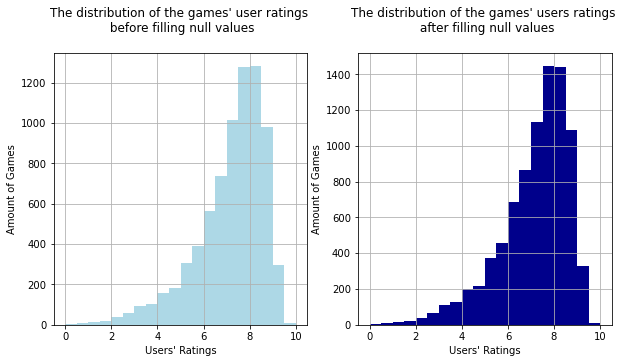

count         mean        std     min     25%      50%  \
year_of_release  16566.0  2006.489919   5.862700  1980.0  2003.0  2007.00   
na_sales         16566.0     0.263991   0.816496     0.0     0.0     0.08   
eu_sales         16566.0     0.145822   0.505378     0.0     0.0     0.02   
jp_sales         16566.0     0.078025   0.310077     0.0     0.0     0.00   
other_sales      16566.0     0.047570   0.187482     0.0     0.0     0.01   
critic_score      9034.0    68.804793  14.112548    13.0    60.0    71.00   
user_score        7539.0     7.125242   1.498237     0.0     6.4     7.50   
user_score_new    8638.0     7.091485   1.501774     0.0     6.3     7.40   

                     75%      max  
year_of_release  2010.00  2016.00  
na_sales            0.24    41.36  
eu_sales            0.11    28.96  
jp_sales            0.04    10.22  
other_sales         0.03    10.57  
critic_score       79.00    98.00  
user_score          8.20     9.70  
user_score_new      8.20     9.70

In [70]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plot_range = (0, 10)

# first plot: the histogram:
axs[0].hist(x = games['user_score'], range = plot_range,bins = 20, color='lightblue')
axs[0].grid()
# the title:
axs[0].set_title("The distribution of the games' user ratings \n before filling null values\n")
# axis labels:
axs[0].set_xlabel("Users' Ratings")
axs[0].set_ylabel('Amount of Games')

# second plot: the histogram:
axs[1].hist(x = games['user_score_new'], range = plot_range,bins = 20, color='darkblue')
axs[1].grid()
# the title:
axs[1].set_title("The distribution of the games' users ratings \n after filling null values\n")
# axis labels:
axs[1].set_xlabel("Users' Ratings")
axs[1].set_ylabel('Amount of Games')

plt.show()
games.describe().fillna('N/A').T

I compared the distribution of the values in the original user score column and the additional column where the missing values were filled - no anomalies were created. 

However, since the percentage of the remaining missing values is extremely high and for the purpose of not distorting the data - I decided to leave them as null. 

In [71]:
games['user_score'] = games['user_score_new']

In [72]:
games = games.drop('user_score_new', 1)

/var/folders/zk/dmfz7khd1d7527x4jk58bf6r0000gn/T/ipykernel_92090/68865396.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  games = games.drop('user_score_new', 1)


In [73]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16566 non-null  object 
 1   platform         16566 non-null  object 
 2   year_of_release  16566 non-null  int64  
 3   genre            16566 non-null  object 
 4   na_sales         16566 non-null  float64
 5   eu_sales         16566 non-null  float64
 6   jp_sales         16566 non-null  float64
 7   other_sales      16566 non-null  float64
 8   critic_score     9034 non-null   float64
 9   user_score       8638 non-null   float64
 10  rating           9867 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


I replaced the values in the original column with those in the new column and deleted the column. I checked that the column was removed. 

#### The "Rating" Column

In [74]:
games.loc[games['rating'].isnull()]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES             1985      Platform   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                             Tetris       GB             1989        Puzzle   
9                          Duck Hunt      NES             1984       Shooter   
10                        Nintendogs       DS             2005    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16711               LMA Manager 2007     X360             2006        Sports   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16713               Spirits & Spells      GBA             2003      Platform   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1         29.08      3.58      6.81         0.77           NaN         NaN   
4         11.27      8.89     10.22         1.00           NaN         NaN   
5         23.20      2.26      4.22         0.58           NaN         NaN   
9         26.93      0.63      0.28         0.47           NaN         NaN   
10         9.05     10.95      1.93         2.74           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.00      0.01      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   
16713      0.01      0.00      0.00         0.00           NaN         NaN   
16714      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[6699 rows x 11 columns]

In [75]:
len(games.loc[games['rating'].isnull()])/ len(games.rating)

0.4043824701195219

In [76]:
games.pivot_table(index=('rating'), values=('year_of_release'),aggfunc=('median','count'))

count  median
rating                
AO         1.0  2005.0
E       3957.0  2007.0
E10+    1412.0  2009.0
EC         8.0  2010.0
K-A        3.0  1997.0
M       1554.0  2009.0
RP         2.0  2008.0
T       2930.0  2007.0

I located the missing values in the rating column and checked the distribution of the values in the column. There are 6699 missing values in the column, they consist of approx. 40% of the data frame. 

It should also be noted that some ratings are overwhelmingly more common than others that are perhaps no longer in use. 

In [77]:
rating_dict = {'AO':0, 'K-A':1, 'RP':2, 'EC':3, 'E10+':4, 'M':5, 'T':6, 'E':7}

In [78]:
rating_dict.keys()

dict_keys(['AO', 'K-A', 'RP', 'EC', 'E10+', 'M', 'T', 'E'])

In [79]:
rating_dict.values()

dict_values([0, 1, 2, 3, 4, 5, 6, 7])

In [80]:
games['rating_dict'] = games['rating'].map(rating_dict)

In [81]:
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   rating_dict  
0          7.0  
1          NaN  
2          7.0  
3          7.0  
4          NaN

For the purpose of filling some of the missing values I turned the ratings, which are objects and not numerical, to numbers using a dictionary in a new column. I checked that the mapping of the dictionary worked correctly. 

In [82]:
games['rating_dict'].fillna(games.groupby(['name'])['rating_dict'].transform('median'), inplace=True)

In [83]:
games['rating_dict'] = games['rating_dict'].round()

In [84]:
games.head(10)

name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     41.36     28.96      3.77         8.45          76.0         8.0      E   
1     29.08      3.58      6.81         0.77           NaN         NaN    NaN   
2     15.68     12.76      3.79         3.29          82.0         8.3      E   
3     15.61     10.93      3.28         2.95          80.0         8.0      E   
4     11.27      8.89     10.22         1.00           NaN         NaN    NaN   
5     23.20      2.26      4.22         0.58           NaN         NaN    NaN   
6     11.28      9.14      6.50         2.88          89.0         8.5      E   
7     13.96      9.18      2.93         2.84          58.0         6.6      E   
8     14.44      6.94      4.70         2.24          87.0         8.4      E   
9     26.93      0.63      0.28         0.47           NaN         NaN    NaN   

   rating_dict  
0          7.0  
1          NaN  
2          7.0  
3          7.0  
4          NaN  
5          NaN  
6          7.0  
7          7.0  
8          7.0  
9          NaN

I filled the missing values in the new column with the median of the column grouped by the games' names (assuming that the rating is similar across platforms). I rounded the numerical ratings and printed a sample of the data frame. 

In [85]:
print(games['rating'].value_counts())
print('-----------------------------')
print(games['rating_dict'].value_counts())

E       3957
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64
-----------------------------
7.0    4114
6.0    3065
5.0    1647
4.0    1461
3.0      10
1.0       4
2.0       2
0.0       1
Name: rating_dict, dtype: int64


I checked the distribution of the ratings, both the object and numerical ratings. 

In [86]:
games['rating'] = games['rating'].map(rating_dict)

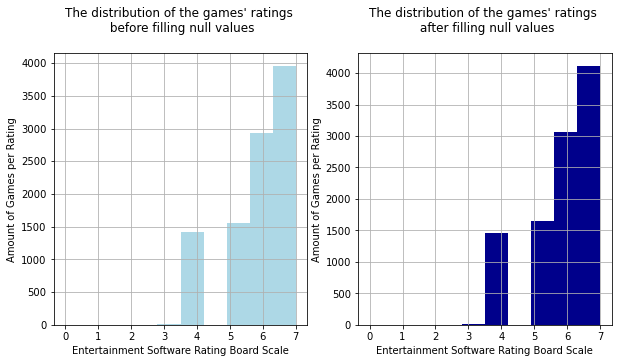

count unique                          top  freq  \
name               16566  11426  Need for Speed: Most Wanted    12   
platform           16566     31                          PS2  2140   
year_of_release  16566.0    N/A                          N/A   N/A   
genre              16566     12                       Action  3342   
na_sales         16566.0    N/A                          N/A   N/A   
eu_sales         16566.0    N/A                          N/A   N/A   
jp_sales         16566.0    N/A                          N/A   N/A   
other_sales      16566.0    N/A                          N/A   N/A   
critic_score      9034.0    N/A                          N/A   N/A   
user_score        8638.0    N/A                          N/A   N/A   
rating            9867.0    N/A                          N/A   N/A   
rating_dict      10304.0    N/A                          N/A   N/A   

                        mean        std     min     25%     50%     75%  \
name                     N/A        N/A     N/A     N/A     N/A     N/A   
platform                 N/A        N/A     N/A     N/A     N/A     N/A   
year_of_release  2006.489919     5.8627  1980.0  2003.0  2007.0  2010.0   
genre                    N/A        N/A     N/A     N/A     N/A     N/A   
na_sales            0.263991   0.816496     0.0     0.0    0.08    0.24   
eu_sales            0.145822   0.505378     0.0     0.0    0.02    0.11   
jp_sales            0.078025   0.310077     0.0     0.0     0.0    0.04   
other_sales          0.04757   0.187482     0.0     0.0    0.01    0.03   
critic_score       68.804793  14.112548    13.0    60.0    71.0    79.0   
user_score          7.091485   1.501774     0.0     6.3     7.4     8.2   
rating              5.951961   1.072632     0.0     5.0     6.0     7.0   
rating_dict         5.949631   1.071856     0.0     5.0     6.0     7.0   

                    max  
name                N/A  
platform            N/A  
year_of_release  2016.0  
genre               N/A  
na_sales          41.36  
eu_sales          28.96  
jp_sales          10.22  
other_sales       10.57  
critic_score       98.0  
user_score          9.7  
rating              7.0  
rating_dict         7.0

In [87]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

plot_range = (0, 7)

# first plot: the histogram:
axs[0].hist(x = games['rating'], range = plot_range,bins = 10, color='lightblue')
axs[0].grid()
# the title:
axs[0].set_title("The distribution of the games' ratings \n before filling null values\n")
# axis labels:
axs[0].set_xlabel('Entertainment Software Rating Board Scale')
axs[0].set_ylabel('Amount of Games per Rating')

# second plot: the histogram:
axs[1].hist(x = games['rating_dict'], range = plot_range,bins = 10, color='darkblue')
axs[1].grid()
# the title:
axs[1].set_title("The distribution of the games' ratings \n after filling null values\n")
# axis labels:
axs[1].set_xlabel('Entertainment Software Rating Board Scale')
axs[1].set_ylabel('Amount of Games per Rating')

plt.show()

games.describe(include='all').fillna('N/A').T

I applied the dictionary to the original rating column and checked that no anomalies were created. 

In [88]:
games.pivot_table(index=(['rating_dict']),values=('year_of_release'), aggfunc=('max', 'min', 'count')).reset_index().sort_values(by='count', ascending=False)

rating_dict  count   max   min
7          7.0   4114  2016  1981
6          6.0   3065  2016  1980
5          5.0   1647  2016  1982
4          4.0   1461  2016  1988
3          3.0     10  2011  2005
1          1.0      4  1998  1996
2          2.0      2  2011  2005
0          0.0      1  2005  2005

I created a pivot table that presents how many values there are for each rating, and when they were first and last in use. 

In [89]:
len(games.loc[games['rating_dict'].isnull()])/len(games)

0.37800313895931426

In [90]:
len(games)-len(games.loc[games['rating_dict'].notnull()])

6262

In [91]:
null_rating = games.loc[games['rating_dict'].isnull()]
null_rating.describe(include='all').fillna('N/A').T

count unique      top  freq         mean        std     min  \
name               6262   5428  FIFA 12     7          N/A        N/A     N/A   
platform           6262     31       PS   949          N/A        N/A     N/A   
year_of_release  6262.0    N/A      N/A   N/A  2004.756947   7.477871  1980.0   
genre              6262     12   Action  1034          N/A        N/A     N/A   
na_sales         6262.0    N/A      N/A   N/A     0.178996   0.817372     0.0   
eu_sales         6262.0    N/A      N/A   N/A     0.086927   0.352135     0.0   
jp_sales         6262.0    N/A      N/A   N/A     0.127822   0.390365     0.0   
other_sales      6262.0    N/A      N/A   N/A      0.02137   0.093397     0.0   
critic_score       60.0    N/A      N/A   N/A    66.616667  13.055412    31.0   
user_score         62.0    N/A      N/A   N/A     6.787097   1.499561     3.1   
rating              0.0    N/A      N/A   N/A          N/A        N/A     N/A   
rating_dict         0.0    N/A      N/A   N/A          N/A        N/A     N/A   

                    25%     50%     75%     max  
name                N/A     N/A     N/A     N/A  
platform            N/A     N/A     N/A     N/A  
year_of_release  1999.0  2007.0  2010.0  2016.0  
genre               N/A     N/A     N/A     N/A  
na_sales            0.0     0.0     0.1   29.08  
eu_sales            0.0     0.0    0.04   10.95  
jp_sales            0.0    0.02     0.1   10.22  
other_sales         0.0     0.0    0.01    2.74  
critic_score       58.0    67.5   76.25    93.0  
user_score        6.025     7.1     8.0     9.2  
rating              N/A     N/A     N/A     N/A  
rating_dict         N/A     N/A     N/A     N/A

There are still 6262 missing values in the new rating column and they consist of approx. 37% of the data frame. The null values are widely distributed - 31 platforms, 12 genres and from 1980 to 2016. 

In [92]:
games['rating'] = games['rating_dict']

In [93]:
rating_reverse_dict = {0:'AO', 1:'K-A', 2:'RP', 3:'EC', 4:'E10+', 5:'M', 6:'T', 7:'E'}

In [94]:
games['rating'] = games['rating'].map(rating_reverse_dict)

In [95]:
games = games.drop('rating_dict', 1)

/var/folders/zk/dmfz7khd1d7527x4jk58bf6r0000gn/T/ipykernel_92090/207280931.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  games = games.drop('rating_dict', 1)


I replaced the values in the original column with the values in the additional column, created a reverse dictionary and mapped the column accordingly. Then, I deleted the additional column. 

In [96]:
games['rating'] = games['rating'].fillna('N/A')

In [97]:
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    N/A  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    N/A

Since I have no way of filling in the remaining values in the rating column, I filled the remaining missing values with "N/A" and printed a sample of the data frame. 

In [98]:
games.loc[games['rating'].isnull()]

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

In [99]:
for i in games:
    if games[i].isnull().sum()>0:
        print(i)

critic_score
user_score


I checked if there are remaining missing values in the rating column - there are none and there are intentional missing values in two columns.

### Looking for Duplicates

In [100]:
games.duplicated().sum()

0

I checked if there are any duplicate rows in the data frame, none were located. 

### Adding a Column with Total Sales Per Game 

In [101]:
games['total_sales_in_millions']=games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    N/A   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    N/A   

   total_sales_in_millions  
0                    82.54  
1                    40.24  
2                    35.52  
3                    32.77  
4                    31.38

I created a column with each games total sales in millions, per platform. 

### Categorization of Decades

In [102]:
year_pivot = games.pivot_table(index='year_of_release', values = 'name',aggfunc=('count')).reset_index().sort_values('year_of_release', ascending=False)
year_pivot.columns = ['Year of Release', 'No. of Games per Year']
year_pivot.head()

Year of Release  No. of Games per Year
36             2016                    502
35             2015                    606
34             2014                    581
33             2013                    548
32             2012                    661

I checked the distribution of the games across years of release - games in the data frame were released in 37 years. 

In [103]:
def assign_decade(year):
    if year < 0 or pd.isna(year):
         return 'NA'
    elif year < 1979:
        return '0-1979'
    elif year < 1990:
        return '1980-1989'
    elif year < 2000:
        return '1990-1999'
    elif year < 2010:
        return '2000-2009'
    else: return '2010-2016'

In [104]:
print(assign_decade(1990))

1990-1999


In [105]:
print(assign_decade(2015))

2010-2016


In [106]:
games['release_decade'] = games['year_of_release'].apply(assign_decade)

I created a function that assigns in game a decade of release, I checked that the function works and applies it in a new column. 

In [107]:
games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    N/A   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    N/A   

   total_sales_in_millions release_decade  
0                    82.54      2000-2009  
1                    40.24      1980-1989  
2                    35.52      2000-2009  
3                    32.77      2000-2009  
4                    31.38      1990-1999

I printed a sample of the data frame with the new column. 

### Conclusion

In the data preprocessing section, we started with 16715 rows in 11 columns and missing values in 6 columns:
 - The name and genre column had 2 missing values each - these rows were removed.
 - The year of release column had 269 values missing - I filled some of the missing values with the median of the year_of_release column grouped by the games' names. Then, I deleted the remaining rows with missing values.
 - The critic score column, had more than 50% of the values are missing (8578 values) - I filled in the missing values with the median of the critic_score column grouped by name and then grouped by name and genre. In order to not distort the data, I left the rest of the values null.
 - The user score column, had more than 40% of the values are missing (6701 values) - I filled the missing values with the median of the user_score column grouped by the games' names. In order to not distort the data, I left the rest of the values null.
 - The rating column, more than 40% of the values are missing (6766 values) - I filled the missing values with the median of the column grouped by the games' names (assuming that the rating is similar across platforms), the rest of the missing values I filled with "N/A".
 
Then, I check if there are any duplicate rows (after locating one and deleting it previously). There were none. I created two new columns:
 - "total_sales_in_millions" which had the aggregated sales generated by each game in the data frame.
 - "release_decade" displaying one of four decades in which the game was released. 
 
We finished this section with 16566 rows and 13 columns and missing values in two columns. 

## Checking the Clean Data

Now that the section of the data preprocessing is complete, I will do a quick scan of the clean data frame (taking into account that the missing values were left untouched intentionally). 

In [108]:
games.head(15)

name platform  year_of_release         genre  \
0                    Wii Sports      Wii             2006        Sports   
1             Super Mario Bros.      NES             1985      Platform   
2                Mario Kart Wii      Wii             2008        Racing   
3             Wii Sports Resort      Wii             2009        Sports   
4      Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                        Tetris       GB             1989        Puzzle   
6         New Super Mario Bros.       DS             2006      Platform   
7                      Wii Play      Wii             2006          Misc   
8     New Super Mario Bros. Wii      Wii             2009      Platform   
9                     Duck Hunt      NES             1984       Shooter   
10                   Nintendogs       DS             2005    Simulation   
11                Mario Kart DS       DS             2005        Racing   
12  Pokemon Gold/Pokemon Silver       GB             1999  Role-Playing   
13                      Wii Fit      Wii             2007        Sports   
14           Kinect Adventures!     X360             2010          Misc   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0      41.36     28.96      3.77         8.45          76.0         8.0   
1      29.08      3.58      6.81         0.77           NaN         NaN   
2      15.68     12.76      3.79         3.29          82.0         8.3   
3      15.61     10.93      3.28         2.95          80.0         8.0   
4      11.27      8.89     10.22         1.00           NaN         NaN   
5      23.20      2.26      4.22         0.58           NaN         NaN   
6      11.28      9.14      6.50         2.88          89.0         8.5   
7      13.96      9.18      2.93         2.84          58.0         6.6   
8      14.44      6.94      4.70         2.24          87.0         8.4   
9      26.93      0.63      0.28         0.47           NaN         NaN   
10      9.05     10.95      1.93         2.74           NaN         NaN   
11      9.71      7.47      4.13         1.90          91.0         8.6   
12      9.00      6.18      7.20         0.71           NaN         NaN   
13      8.92      8.03      3.60         2.15          80.0         7.7   
14     15.00      4.89      0.24         1.69          61.0         6.3   

   rating  total_sales_in_millions release_decade  
0       E                    82.54      2000-2009  
1     N/A                    40.24      1980-1989  
2       E                    35.52      2000-2009  
3       E                    32.77      2000-2009  
4     N/A                    31.38      1990-1999  
5     N/A                    30.26      1980-1989  
6       E                    29.80      2000-2009  
7       E                    28.91      2000-2009  
8       E                    28.32      2000-2009  
9     N/A                    28.31      1980-1989  
10    N/A                    24.67      2000-2009  
11      E                    23.21      2000-2009  
12    N/A                    23.09      1990-1999  
13      E                    22.70      2000-2009  
14      E                    21.82      2010-2016

In [109]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16566 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     16566 non-null  object 
 1   platform                 16566 non-null  object 
 2   year_of_release          16566 non-null  int64  
 3   genre                    16566 non-null  object 
 4   na_sales                 16566 non-null  float64
 5   eu_sales                 16566 non-null  float64
 6   jp_sales                 16566 non-null  float64
 7   other_sales              16566 non-null  float64
 8   critic_score             9034 non-null   float64
 9   user_score               8638 non-null   float64
 10  rating                   16566 non-null  object 
 11  total_sales_in_millions  16566 non-null  float64
 12  release_decade           16566 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 1.8+ MB


In [110]:
games.describe(include='all').fillna('N/A').T

count unique                          top  freq  \
name                       16566  11426  Need for Speed: Most Wanted    12   
platform                   16566     31                          PS2  2140   
year_of_release          16566.0    N/A                          N/A   N/A   
genre                      16566     12                       Action  3342   
na_sales                 16566.0    N/A                          N/A   N/A   
eu_sales                 16566.0    N/A                          N/A   N/A   
jp_sales                 16566.0    N/A                          N/A   N/A   
other_sales              16566.0    N/A                          N/A   N/A   
critic_score              9034.0    N/A                          N/A   N/A   
user_score                8638.0    N/A                          N/A   N/A   
rating                     16566      9                          N/A  6262   
total_sales_in_millions  16566.0    N/A                          N/A   N/A   
release_decade             16566      4                    2000-2009  9270   

                                mean        std     min     25%     50%  \
name                             N/A        N/A     N/A     N/A     N/A   
platform                         N/A        N/A     N/A     N/A     N/A   
year_of_release          2006.489919     5.8627  1980.0  2003.0  2007.0   
genre                            N/A        N/A     N/A     N/A     N/A   
na_sales                    0.263991   0.816496     0.0     0.0    0.08   
eu_sales                    0.145822   0.505378     0.0     0.0    0.02   
jp_sales                    0.078025   0.310077     0.0     0.0     0.0   
other_sales                  0.04757   0.187482     0.0     0.0    0.01   
critic_score               68.804793  14.112548    13.0    60.0    71.0   
user_score                  7.091485   1.501774     0.0     6.3     7.4   
rating                           N/A        N/A     N/A     N/A     N/A   
total_sales_in_millions     0.535408   1.554322     0.0    0.06    0.17   
release_decade                   N/A        N/A     N/A     N/A     N/A   

                            75%     max  
name                        N/A     N/A  
platform                    N/A     N/A  
year_of_release          2010.0  2016.0  
genre                       N/A     N/A  
na_sales                   0.24   41.36  
eu_sales                   0.11   28.96  
jp_sales                   0.04   10.22  
other_sales                0.03   10.57  
critic_score               79.0    98.0  
user_score                  8.2     9.7  
rating                      N/A     N/A  
total_sales_in_millions    0.47   82.54  
release_decade              N/A     N/A

## Analyzing the Data 

Now that the data frame was preprocessed, I will study and analyze it. 

### Amount of Games Release per Decade 

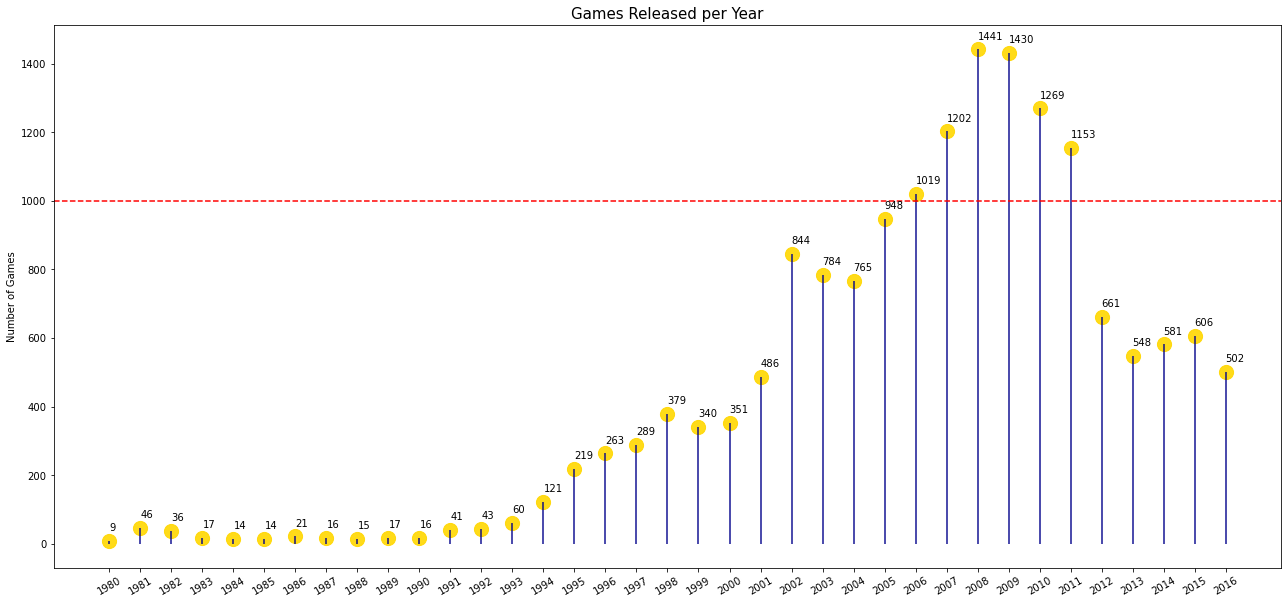

In [111]:
pivot = games.groupby('year_of_release')['name'].count().reset_index()
fig,ax=plt.subplots(figsize=(22,10))
ax.vlines(x=pivot.year_of_release, ymin=0, ymax=pivot.name, color='darkblue', alpha=0.7, linewidth=2)
ax.scatter(x=pivot.year_of_release,y=pivot.name, s=200, color='gold',alpha=0.9)

ax.set_title("Games Released per Year", fontdict={'size':15})
ax.set_ylabel('Number of Games')
ax.set_xticks(pivot.year_of_release)
ax.set_xticklabels(pivot.year_of_release,rotation=30)
ax.axhline(y=1000, ls='--',color="red")


for row in pivot.itertuples():
    ax.text(row.year_of_release, row.name+30,s=row.name)

plt.show()

From the graph above, we can see that even though the games in the data frame were released from 1980 until 2016 (37 years), the lion's share of games were released after 2002 and that the number of games release per year peaked between 2006-2010.

Hereinafter, I will also do an overview of the games released per decade. 

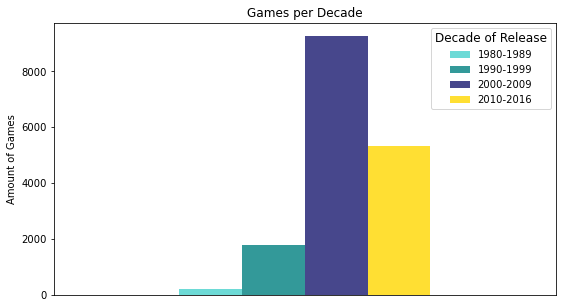


In 2000-2009, approximately 926 games were released per year, the number of games that were released increased by 
more than 528% than the previous decade. In the following decade, 2010-2016, approximately 759 games were released 
per year. 
By this calculation, approximately 7586 games will be released by the end of 2020, if not more.


In [112]:
games.pivot_table(values='name', columns ='release_decade', aggfunc=('count')).plot(figsize=(9,5), alpha=0.8,width=0.5, align='center', kind='bar', 
                                                                                                         color = ("mediumturquoise", "teal","midnightblue", "gold"))
plt.title("Games per Decade")
plt.xticks([])
plt.ylabel("Amount of Games")
plt.legend(title="Decade of Release", fontsize=10, title_fontsize=12)
plt.show()
decade_count_pivot = games.pivot_table(index='release_decade',values='name', aggfunc='count').reset_index().sort_values(by='name')
decade_count_pivot.columns = ['Decade of Release', 'No. of Games per Decade']
print()
print("""In 2000-2009, approximately {:.0f} games were released per year, the number of games that were released increased by 
more than {:.0f}% than the previous decade. In the following decade, 2010-2016, approximately {:.0f} games were released 
per year. 
By this calculation, approximately {:.0f} games will be released by the end of 2020, if not more.""".format(9262/10, (9262/1753*100), 5310/7,(5310/7)*10))

### Sales per Platform

Hereinafter, I will check the distribution of sales across all the platforms in the data frame. 

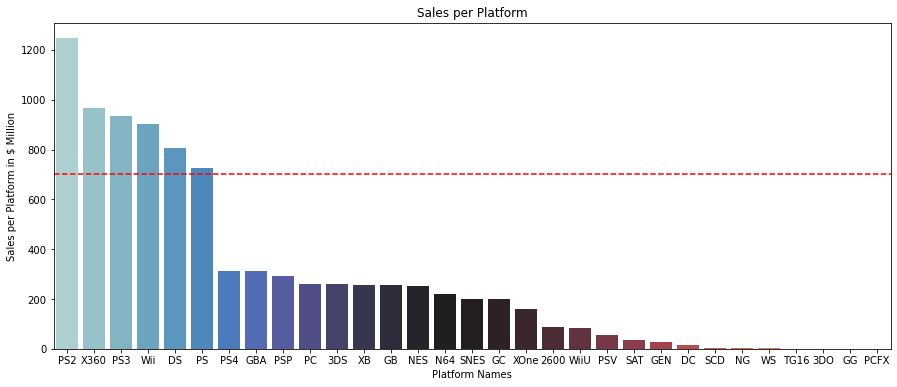

In [113]:
platform_profit = games.pivot_table(index='platform', values = 'total_sales_in_millions',aggfunc=('sum')).reset_index().sort_values('total_sales_in_millions', ascending=False)
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='platform',y="total_sales_in_millions", palette=sns.color_palette('icefire', 30), data=platform_profit)
plt.title("Sales per Platform")
plt.xlabel("Platform Names")
plt.ylabel("Sales per Platform in $ Million")
ax.axhline(y=700, ls="--",color="red")
plt.show()


From the graph and accompanying pivot table, we can see that out of 31 platforms in 37 years - 6 platforms were the most profitable each generating more than $700 Million in sales.

The most profitable platforms are PS2, X360, PS3, Wii, DS and PS. These platforms will be explored in the following section. 

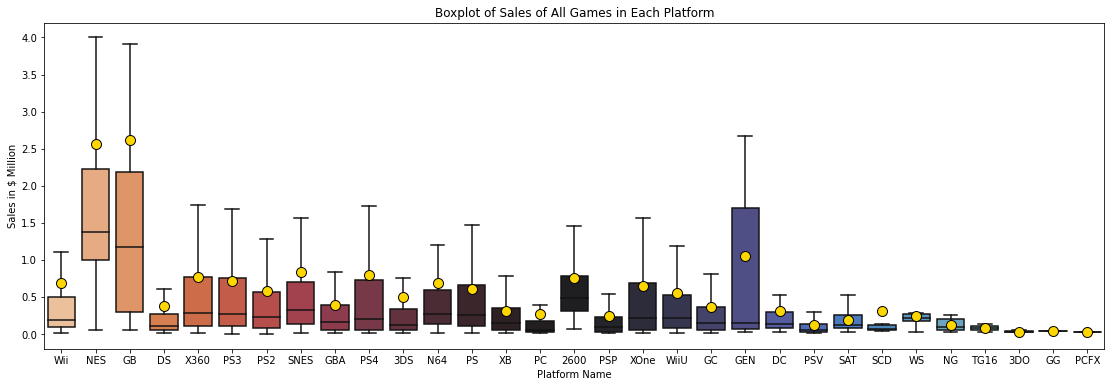

In [114]:
plt.figure(figsize=(19,6))
sns.boxplot(x="platform", y="total_sales_in_millions",showfliers=False, palette=sns.color_palette('icefire_r', 30), showmeans=True, meanprops={"marker": "o",
                       "markerfacecolor":"gold", 
                       "markeredgecolor":"black",
                       "markersize": "10"}, data=games)
plt.ylabel('Sales in $ Million')
plt.xlabel('Platform Name')
plt.title('Boxplot of Sales of All Games in Each Platform')
plt.show()

If we look at how individual games sold in each platform, we see that games released on NES, GB and GEN were the most profitable on their own and their average sales are also the highest - even if those platforms were not as profitable as other platforms (to put it mildly).

#### Platforms with Highest Total Sales

In [115]:
top_data = games.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')

I created a slice of the data frame with only the previously mentioned top 6 platforms. 

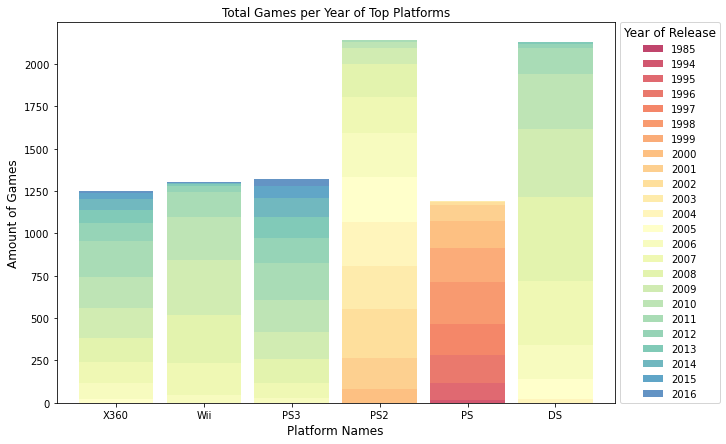

count unique        top  freq        mean  \
name                       9329   7300   Monopoly     6         N/A   
platform                   9329      6        PS2  2140         N/A   
year_of_release          9329.0    N/A        N/A   N/A  2006.76825   
genre                      9329     12     Action  1769         N/A   
na_sales                 9329.0    N/A        N/A   N/A    0.298097   
eu_sales                 9329.0    N/A        N/A   N/A    0.171336   
jp_sales                 9329.0    N/A        N/A   N/A    0.065756   
other_sales              9329.0    N/A        N/A   N/A    0.063387   
critic_score             5040.0    N/A        N/A   N/A   67.385218   
user_score               4803.0    N/A        N/A   N/A    6.998199   
rating                     9329      7        N/A  3242         N/A   
total_sales_in_millions  9329.0    N/A        N/A   N/A    0.598576   
release_decade             9329      4  2000-2009  5811         N/A   

                               std     min     25%     50%     75%     max  
name                           N/A     N/A     N/A     N/A     N/A     N/A  
platform                       N/A     N/A     N/A     N/A     N/A     N/A  
year_of_release           4.506629  1985.0  2005.0  2008.0  2010.0  2016.0  
genre                          N/A     N/A     N/A     N/A     N/A     N/A  
na_sales                  0.842657     0.0    0.02     0.1    0.28   41.36  
eu_sales                  0.591716     0.0     0.0    0.03    0.14   28.96  
jp_sales                   0.27207     0.0     0.0     0.0    0.03     6.5  
other_sales               0.234238     0.0     0.0    0.02    0.05   10.57  
critic_score             14.563398    13.0    58.0    69.0    78.0    98.0  
user_score                1.527452     0.0     6.2     7.3     8.1     9.7  
rating                         N/A     N/A     N/A     N/A     N/A     N/A  
total_sales_in_millions   1.713938     0.0    0.08     0.2    0.54   82.54  
release_decade                 N/A     N/A     N/A     N/A     N/A     N/A

In [116]:
top_data.pivot_table(index='platform', columns=['year_of_release'],values = 'name',aggfunc='count', fill_value=0).sort_values(by='platform', ascending=False).plot(figsize=(10,7), stacked=True,alpha=0.8, align='center', width = 0.85,kind='bar', 
                                                                                                         color=sns.color_palette('Spectral', 25))
plt.title('Total Games per Year of Top Platforms',fontsize=12)
plt.xlabel('Platform Names',fontsize=12)
plt.ylabel('Amount of Games',fontsize=12)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title="Year of Release", fontsize=10, title_fontsize=12)
plt.tick_params(rotation='auto',axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show() 
display(top_data.describe(include='all').fillna('N/A').T)

I checked the distribution of the data slice - the combined platforms had 7300 different games released from 1985-2016, in 12 genres. Most games were released for PS2 platform, which is also the most profitable of all the platforms. 

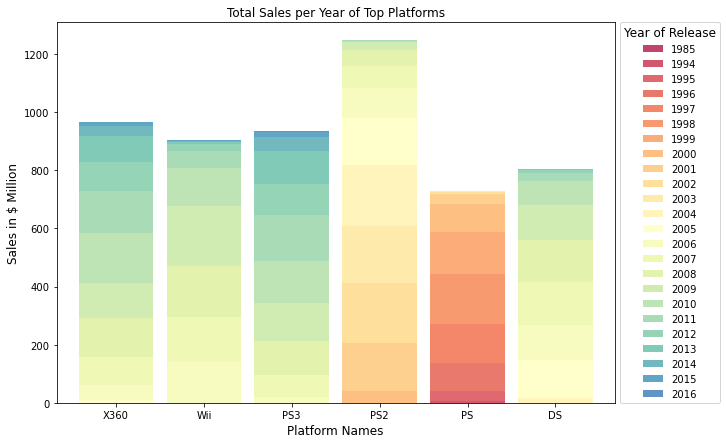

As we can see from the graph above, of the 6 most profitable platforms, PS sold up until 2001.
PS2 sold from about 2000 to 2008 and then PS3 from about 2006 and had little sales in 2016. 
DS sold from about 2005 till 2011, as did Wii and X360 till about 2013-2014.


Distribution of Sales 
 
 
 
 sum 
 mean 
 std 
 var 
 
 
 platform 
 
 
 
 
 
 
 
 
 DS 
 804.28 
 0.377774 
 1.433447 
 2.054769 
 
 
 PS 
 727.58 
 0.611412 
 1.056807 
 1.116841 
 
 
 PS2 
 1247.16 
 0.582785 
 1.141568 
 1.303177 
 
 
 PS3 
 935.18 
 0.709007 
 1.396987 
 1.951573 
 
 
 Wii 
 903.31 
 0.694320 
 3.148382 
 9.912312 
 
 
 X360 
 966.61 
 0.773288 
 1.621747 
 2.630063 
 
 
 Distribution of Games 
 
 
 
 count 
 min 
 max 
 
 
 platform 
 
 
 
 
 
 
 
 DS 
 2129 
 1985 
 2013 
 
 
 PS 
 1190 
 1994 
 2003 
 
 
 PS2 
 2140 
 2000 
 2011 
 
 
 PS3 
 1319 
 2005 
 2016 
 
 
 Wii 
 1301 
 2006 
 2016 
 
 
 X360 
 1250 
 2005 
 2016

From the tables above, we can see that PS2 had the most games released and was the most profitable of all top 
platforms.
DS has the second most games released but was less profitable than PS2, by about a 1/3. 
PS3, Wii and X360 are the most profitable after PS2 and also had the three top average sales but each had 
approx. half amount of games released than PS2. 
The PS platform has the least amount of games released, generated the least amount of sales but its sales average is higher of both DS and PS2.
We can see that platforms are sold for about 10-11 years (DS only seems to have been on the market for nearly
20 years, it was re-released in 2004).


Sales per Year 
 
 
 platform 
 DS 
 PS 
 PS2 
 PS3 
 Wii 
 X360 
 
 
 year_of_release 
 
 
 
 
 
 
 
 
 
 
 1985 
 0.02 
 0.00 
 0.00 
 0.00 
 0.00 
 0.00 
 
 
 1994 
 -0.02 
 6.03 
 0.00 
 0.00 
 0.00 
 0.00 
 
 
 1995 
 0.00 
 29.93 
 0.00 
 0.00 
 0.00 
 0.00 
 
 
 1996 
 0.00 
 58.74 
 0.00 
 0.00 
 0.00 
 0.00 
 
 
 1997 
 0.00 
 41.47 
 0.00 
 0.00 
 0.00 
 0.00 
 
 
 1998 
 0.00 
 33.32 
 0.00 
 0.00 
 0.00 
 0.00 
 
 
 1999 
 0.00 
 -24.96 
 0.00 
 0.00 
 0.00 
 0.00 
 
 
 2000 
 0.00 
 -48.16 
 39.17 
 0.00 
 0.00 
 0.00 
 
 
 2001 
 0.00 
 -60.78 
 127.26 
 0.00 
 0.00 
 0.00 
 
 
 2002 
 0.00 
 -28.92 
 41.93 
 0.00 
 0.00 
 0.00 
 
 
 2003 
 0.00 
 -4.60 
 -15.31 
 0.00 
 0.00 
 0.00 
 
 
 2004 
 17.27 
 -2.07 
 19.71 
 0.00 
 0.00 
 0.00 
 
 
 2005 
 112.87 
 0.00 
 -51.85 
 0.19 
 0.00 
 9.22 
 
 
 2006 
 -10.33 
 0.00 
 -56.92 
 21.25 
 140.19 
 42.57 
 
 
 2007 
 27.42 
 0.00 
 -27.89 
 51.75 
 13.22 
 43.62 
 
 
 2008 
 -1.87 
 0.00 
 -22.20 
 45.60 
 24.27 
 40.66 
 
 
 2009 
 -25.80 
 0.00 
 -27.50 
 12.14 
 29.29 
 -15.25 
 
 
 2010 
 -34.21 
 0.00 
 -20.76 
 12.03 
 -78.30 
 49.73 
 
 
 2011 
 -59.02 
 0.00 
 -5.19 
 15.02 
 -68.88 
 -25.32 
 
 
 2012 
 -14.66 
 0.00 
 -0.45 
 -49.71 
 -36.85 
 -44.51 
 
 
 2013 
 -10.13 
 0.00 
 0.00 
 4.98 
 -14.35 
 -12.14 
 
 
 2014 
 -1.54 
 0.00 
 0.00 
 -65.49 
 -4.84 
 -53.84 
 
 
 2015 
 0.00 
 0.00 
 0.00 
 -30.94 
 -2.61 
 -22.78 
 
 
 2016 
 0.00 
 0.00 
 0.00 
 -13.22 
 -0.96 
 -10.44 
 
 
 Games per Year 
 
 
 platform 
 DS 
 PS 
 PS2 
 PS3 
 Wii 
 X360 
 
 
 year_of_release 
 
 
 
 
 
 
 
 
 
 
 1985 
 1 
 0 
 0 
 0 
 0 
 0 
 
 
 1994 
 0 
 17 
 0 
 0 
 0 
 0 
 
 
 1995 
 0 
 99 
 0 
 0 
 0 
 0 
 
 
 1996 
 0 
 164 
 0 
 0 
 0 
 0 
 
 
 1997 
 0 
 188 
 0 
 0 
 0 
 0 
 
 
 1998 
 0 
 248 
 0 
 0 
 0 
 0 
 
 
 1999 
 0 
 200 
 0 
 0 
 0 
 0 
 
 
 2000 
 0 
 160 
 82 
 0 
 0 
 0 
 
 
 2001 
 0 
 91 
 185 
 0 
 0 
 0 
 
 
 2002 
 0 
 20 
 285 
 0 
 0 
 0 
 
 
 2003 
 0 
 3 
 258 
 0 
 0 
 0 
 
 
 2004 
 23 
 0 
 260 
 0 
 0 
 0 
 
 
 2005 
 118 
 0 
 261 
 1 
 0 
 21 
 
 
 2006 
 201 
 0 
 262 
 28 
 48 
 94 
 
 
 2007 
 377 
 0 
 215 
 90 
 187 
 123 
 
 
 2008 
 494 
 0 
 191 
 139 
 286 
 147 
 
 
 2009 
 404 
 0 
 96 
 162 
 325 
 174 
 
 
 2010 
 324 
 0 
 38 
 187 
 254 
 185 
 
 
 2011 
 155 
 0 
 7 
 219 
 146 
 212 
 
 
 2012 
 24 
 0 
 0 
 148 
 32 
 108 
 
 
 2013 
 8 
 0 
 0 
 126 
 12 
 75 
 
 
 2014 
 0 
 0 
 0 
 108 
 6 
 63 
 
 
 2015 
 0 
 0 
 0 
 73 
 4 
 35 
 
 
 2016 
 0 
 0 
 0 
 38 
 1 
 13

In [117]:
top_data.pivot_table(index='platform', columns=['year_of_release'],values = 'total_sales_in_millions',aggfunc='sum', fill_value=0).sort_values(by='platform', ascending=False).plot(figsize=(10,7), stacked=True,alpha=0.8, align='center', width = 0.85,kind='bar', 
                                                                                                         color=sns.color_palette('Spectral', 25))
plt.title('Total Sales per Year of Top Platforms',fontsize=12)
plt.xlabel('Platform Names',fontsize=12)
plt.ylabel('Sales in $ Million',fontsize=12)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title="Year of Release", fontsize=10, title_fontsize=12)
plt.tick_params(rotation='auto',axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show() 
print('As we can see from the graph above, of the 6 most profitable platforms, PS sold up until 2001.\nPS2 sold from about 2000 to 2008 and then PS3 from about 2006 and had little sales in 2016. \nDS sold from about 2005 till 2011, as did Wii and X360 till about 2013-2014.')
top_sales_dis = top_data.groupby(['platform'])['total_sales_in_millions'].agg(['sum','mean', 'std', 'var'])
games_dis = top_data.groupby(['platform'])['year_of_release'].agg(['count','min', 'max'])
top_games = top_data.pivot_table(index='year_of_release',values='name', columns ='platform', aggfunc=('count'), fill_value=0)
top_sales_year = top_data.pivot_table(index='year_of_release',values='total_sales_in_millions', columns ='platform', aggfunc=('sum'), fill_value=0)
year_shift = top_sales_year - top_sales_year.shift(+1, fill_value=0)
display_side_by_side(top_sales_dis, games_dis, titles=['Distribution of Sales', 'Distribution of Games'])
print('From the tables above, we can see that PS2 had the most games released and was the most profitable of all top \nplatforms.\nDS has the second most games released but was less profitable than PS2, by about a 1/3. \nPS3, Wii and X360 are the most profitable after PS2 and also had the three top average sales but each had \napprox. half amount of games released than PS2. \nThe PS platform has the least amount of games released, generated the least amount of sales but its sales average is higher of both DS and PS2.\nWe can see that platforms are sold for about 10-11 years (DS only seems to have been on the market for nearly\n20 years, it was re-released in 2004).')
display_side_by_side(year_shift, top_games, titles=['Sales per Year', 'Games per Year'])



As noted above, games on each platform are in the market for about 10-11 years. However, from the tables above, we can see that it takes each platform approx. 2 years to start generating more serious sales, then the sales peak for 3-4 years and then sales dwindle down for about 5 years as less and less games are released on the platform. 

#### Hero to Zero or Zero to Hero?

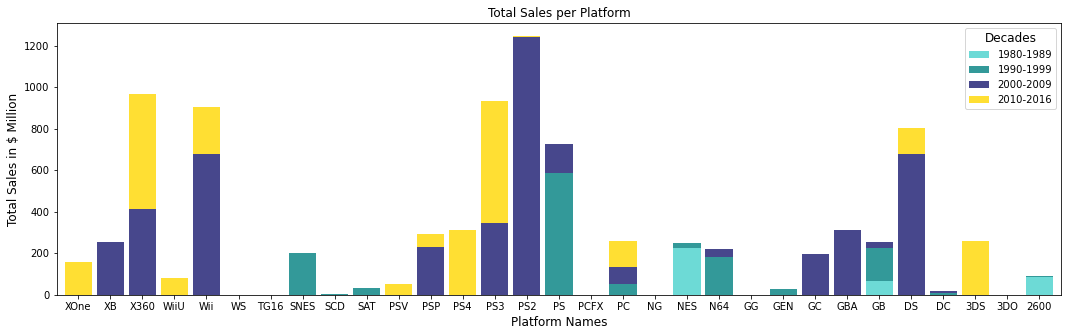

Platforms by Decade 
 
 
 release_decade 
 1980-1989 
 1990-1999 
 2000-2009 
 2010-2016 
 
 
 platform 
 
 
 
 
 
 
 
 
 2600 
 86.48 
 -83.95 
 -2.53 
 0.00 
 
 
 3DO 
 0.00 
 0.10 
 -0.10 
 0.00 
 
 
 3DS 
 0.00 
 0.00 
 0.02 
 258.49 
 
 
 DC 
 0.00 
 8.54 
 -1.13 
 -7.41 
 
 
 DS 
 0.02 
 -0.02 
 679.37 
 -554.48 
 
 
 GB 
 66.40 
 92.63 
 -130.03 
 -29.00 
 
 
 GBA 
 0.00 
 0.00 
 313.73 
 -313.73 
 
 
 GC 
 0.00 
 0.00 
 198.66 
 -198.66 
 
 
 GEN 
 0.00 
 28.35 
 -28.35 
 0.00 
 
 
 GG 
 0.00 
 0.04 
 -0.04 
 0.00 
 
 
 N64 
 0.00 
 180.85 
 -143.22 
 -37.63 
 
 
 NES 
 223.51 
 -195.97 
 -27.54 
 0.00 
 
 
 NG 
 0.00 
 1.44 
 -1.44 
 0.00 
 
 
 PC 
 0.07 
 49.90 
 34.03 
 40.82 
 
 
 PCFX 
 0.00 
 0.03 
 -0.03 
 0.00 
 
 
 PS 
 0.00 
 586.88 
 -446.18 
 -140.70 
 
 
 PS2 
 0.00 
 0.00 
 1241.07 
 -1234.98 
 
 
 PS3 
 0.00 
 0.00 
 344.54 
 246.10 
 
 
 PS4 
 0.00 
 0.00 
 0.00 
 314.14 
 
 
 PSP 
 0.00 
 0.00 
 229.02 
 -164.47 
 
 
 PSV 
 0.00 
 0.00 
 0.00 
 53.81 
 
 
 SAT 
 0.00 
 33.59 
 -33.59 
 0.00 
 
 
 SCD 
 0.00 
 1.86 
 -1.86 
 0.00 
 
 
 SNES 
 0.00 
 200.04 
 -200.04 
 0.00 
 
 
 TG16 
 0.00 
 0.16 
 -0.16 
 0.00 
 
 
 WS 
 0.00 
 0.46 
 0.50 
 -0.96 
 
 
 Wii 
 0.00 
 0.00 
 678.25 
 -453.19 
 
 
 WiiU 
 0.00 
 0.00 
 0.00 
 82.19 
 
 
 X360 
 0.00 
 0.00 
 413.31 
 139.99 
 
 
 XB 
 0.00 
 0.00 
 256.69 
 -256.69 
 
 
 XOne 
 0.00 
 0.00 
 0.00 
 159.32 
 
 
 Platforms' Age 
 
 
 
 count 
 min 
 max 
 age 
 
 
 platform 
 
 
 
 
 
 
 
 
 2600 
 117 
 1980 
 1999 
 19 
 
 
 3DO 
 3 
 1994 
 1995 
 1 
 
 
 3DS 
 515 
 2000 
 2016 
 16 
 
 
 DC 
 52 
 1998 
 2008 
 10 
 
 
 DS 
 2129 
 1985 
 2013 
 28 
 
 
 GB 
 97 
 1988 
 2001 
 13 
 
 
 GBA 
 813 
 2000 
 2007 
 7 
 
 
 GC 
 552 
 2001 
 2007 
 6 
 
 
 GEN 
 27 
 1990 
 1994 
 4 
 
 
 GG 
 1 
 1992 
 1992 
 0 
 
 
 N64 
 318 
 1996 
 2004 
 8 
 
 
 NES 
 98 
 1983 
 1994 
 11 
 
 
 NG 
 12 
 1993 
 1996 
 3 
 
 
 PC 
 970 
 1985 
 2016 
 31 
 
 
 PCFX 
 1 
 1996 
 1996 
 0 
 
 
 PS 
 1190 
 1994 
 2003 
 9 
 
 
 PS2 
 2140 
 2000 
 2011 
 11 
 
 
 PS3 
 1319 
 2005 
 2016 
 11 
 
 
 PS4 
 392 
 2013 
 2016 
 3 
 
 
 PSP 
 1203 
 2004 
 2015 
 11 
 
 
 PSV 
 429 
 2011 
 2016 
 5 
 
 
 SAT 
 173 
 1994 
 1999 
 5 
 
 
 SCD 
 6 
 1993 
 1994 
 1 
 
 
 SNES 
 239 
 1990 
 1999 
 9 
 
 
 TG16 
 2 
 1995 
 1995 
 0 
 
 
 WS 
 6 
 1999 
 2001 
 2 
 
 
 Wii 
 1301 
 2006 
 2016 
 10 
 
 
 WiiU 
 147 
 2012 
 2016 
 4 
 
 
 X360 
 1250 
 2005 
 2016 
 11 
 
 
 XB 
 817 
 2000 
 2008 
 8 
 
 
 XOne 
 247 
 2013 
 2016 
 3


Studying the tables above, we can see that a platform's average life span is approx. 8 years.

However, some platforms defied the odds and either sold for a long period of time or are still around while not 
being the one of the most profitable platforms, e.g. 2600 and PC.
DS has been in the market was initially released in 1985 and then was dormant till 2004 when it was re-released, and 
was the fourth most profitable of all platforms.
On the other hand, we have quite a few platforms that never really took off, like 3DO, GEN, GG, NG, PCFX, SCD, TG16 
and WS. Take note that platforms DS, GBA, PS, PS2, XB, 3DS, X360 and PS3 were once highly profitable but now have 
little to zero sales - especially PS2 which generated the most sales out of all 31 platforms in the data frame.

Lets examine platforms DS, GBA, PS, PS2, XB, 3DS, PS3, PS4, X360 and XOne - platforms that used to be profitable but now have zero sales, some were highly profitable and have dropped considerably and some are yet 

In [118]:
decade_platform_pivot = games.pivot_table(index='platform', columns=['release_decade'],values = 'total_sales_in_millions',aggfunc='sum', fill_value=0)
decade_platform_pivot.sort_values(by='platform', ascending=False).plot(figsize=(18,5), stacked=True,alpha=0.8, align='center', width = 0.85,kind='bar', 
                                                                                                         color = ("mediumturquoise", "teal","midnightblue", "gold"))
plt.title('Total Sales per Platform',fontsize=12)
plt.xlabel('Platform Names',fontsize=12)
plt.ylabel('Total Sales in $ Million',fontsize=12)
plt.legend(title="Decades", fontsize=10, title_fontsize=12)
plt.tick_params(rotation='auto',axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show() 
year_platform = games.groupby(['platform'])['year_of_release'].agg(['count','min', 'max']).sort_values(by='platform')
year_platform['age'] = year_platform['max']-year_platform['min']
decade_platform_shift = decade_platform_pivot - decade_platform_pivot.shift(+1, axis=1, fill_value=0)
display_side_by_side(decade_platform_shift, year_platform, titles=['Platforms by Decade', "Platforms' Age"])
print()
print("Studying the tables above, we can see that a platform's average life span is approx. {:.0f} years.\n".format(year_platform['age'].mean()))
print("However, some platforms defied the odds and either sold for a long period of time or are still around while not \nbeing the one of the most profitable platforms, e.g. 2600 and PC.")
print("DS has been in the market was initially released in 1985 and then was dormant till 2004 when it was re-released, and \nwas the fourth most profitable of all platforms.\nOn the other hand, we have quite a few platforms that never really took off, like 3DO, GEN, GG, NG, PCFX, SCD, TG16 \nand WS. Take note that platforms DS, GBA, PS, PS2, XB, 3DS, X360 and PS3 were once highly profitable but now have \nlittle to zero sales - especially PS2 which generated the most sales out of all 31 platforms in the data frame.")
print()
print("Lets examine platforms DS, GBA, PS, PS2, XB, 3DS, PS3, PS4, X360 and XOne - platforms that used to be profitable but now have zero sales, some were highly profitable and have dropped considerably and some are yet to peak.")


In [119]:
select = games.query('platform == ["DS", "GBA", "PS", "PS2", "XB", "3DS", "PS3", "PS4", "X360", "XOne", "Wii"]')

The Overall Distribution of Sales of Each Platform Per Year:


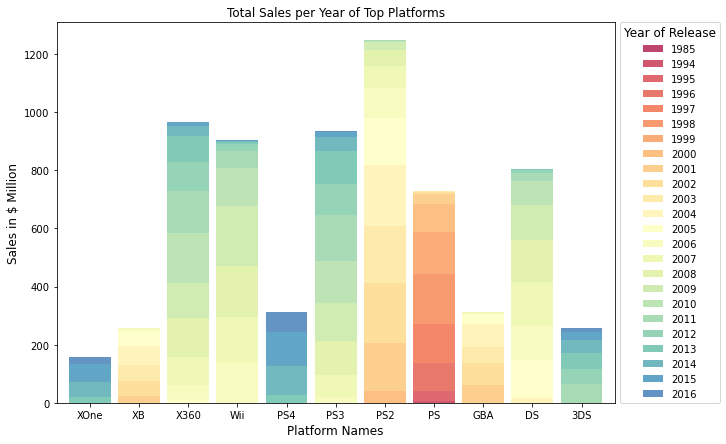

^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^

Let's Check Each Platform's Story More Closely:

DS's Distribution of Games and Sales per Year


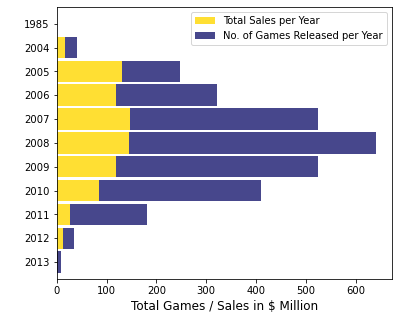

DS's first year of sales was 1985, while its last year of sales was 2013 - all in all, DS's had a life span of 
29 years. In its life span, DS generated a total of $804.28 Million in sales with a total of 2129 games released. 
Its highest annual sales was $147.23 Million and the sales it generated per year were, on avarege, about $73.12
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~

GBA's Distribution of Games and Sales per Year


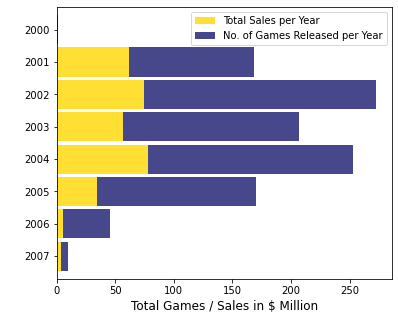

GBA's first year of sales was 2000, while its last year of sales was 2007 - all in all, GBA's had a life span of 
8 years. In its life span, GBA generated a total of $313.73 Million in sales with a total of 813 games released. 
Its highest annual sales was $77.91 Million and the sales it generated per year were, on avarege, about $39.22
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~

PS's Distribution of Games and Sales per Year


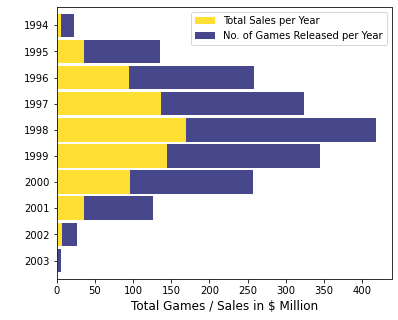

PS's first year of sales was 1994, while its last year of sales was 2003 - all in all, PS's had a life span of 
10 years. In its life span, PS generated a total of $727.58 Million in sales with a total of 1190 games released. 
Its highest annual sales was $169.49 Million and the sales it generated per year were, on avarege, about $72.76
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~

PS2's Distribution of Games and Sales per Year


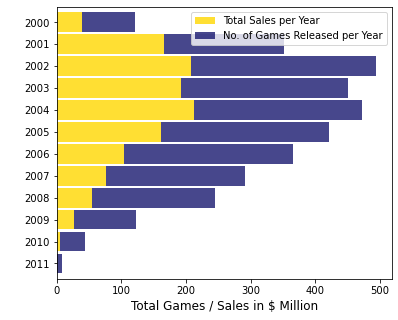

PS2's first year of sales was 2000, while its last year of sales was 2011 - all in all, PS2's had a life span of 
12 years. In its life span, PS2 generated a total of $1247.16 Million in sales with a total of 2140 games released. 
Its highest annual sales was $212.76 Million and the sales it generated per year were, on avarege, about $103.93
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~

XB's Distribution of Games and Sales per Year


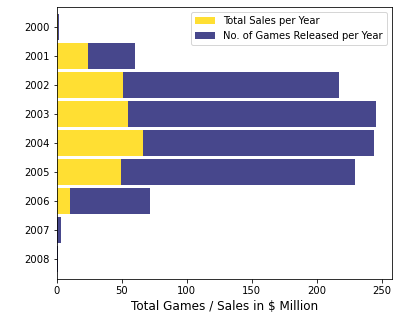

XB's first year of sales was 2000, while its last year of sales was 2008 - all in all, XB's had a life span of 
9 years. In its life span, XB generated a total of $256.69 Million in sales with a total of 817 games released. 
Its highest annual sales was $65.97 Million and the sales it generated per year were, on avarege, about $28.52
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~

Wii's Distribution of Games and Sales per Year


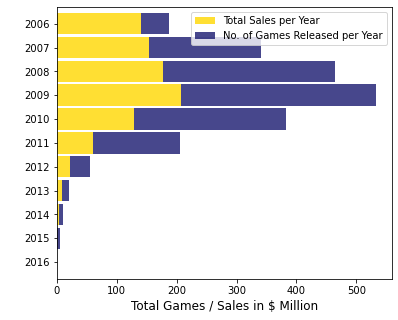

Wii's first year of sales was 2006, while its last year of sales was 2016 - all in all, Wii's had a life span of 
11 years. In its life span, Wii generated a total of $903.31 Million in sales with a total of 1301 games released. 
Its highest annual sales was $206.97 Million and the sales it generated per year were, on avarege, about $82.12
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~

PS3's Distribution of Games and Sales per Year


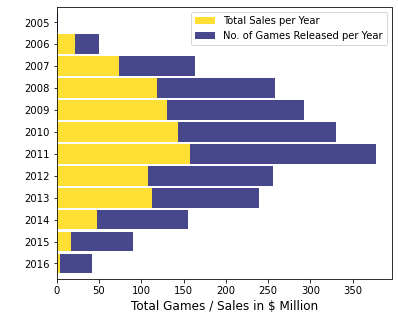

PS3's first year of sales was 2005, while its last year of sales was 2016 - all in all, PS3's had a life span of 
12 years. In its life span, PS3 generated a total of $935.18 Million in sales with a total of 1319 games released. 
Its highest annual sales was $157.98 Million and the sales it generated per year were, on avarege, about $77.93
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~

X360's Distribution of Games and Sales per Year


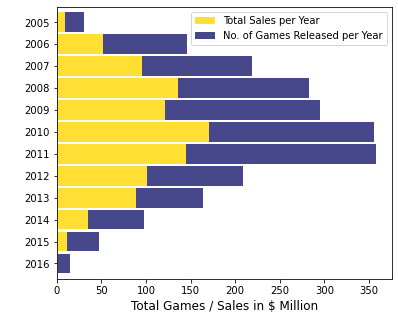

X360's first year of sales was 2005, while its last year of sales was 2016 - all in all, X360's had a life span of 
12 years. In its life span, X360 generated a total of $966.61 Million in sales with a total of 1250 games released. 
Its highest annual sales was $170.55 Million and the sales it generated per year were, on avarege, about $80.55
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~

3DS's Distribution of Games and Sales per Year


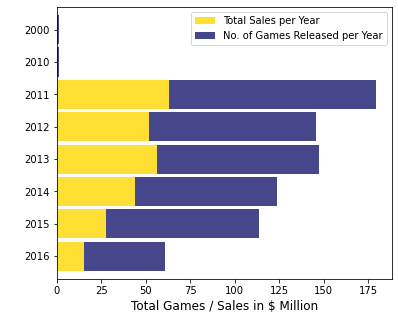

3DS's first year of sales was 2000, while its last year of sales was 2016 - all in all, 3DS's had a life span of 
17 years. In its life span, 3DS generated a total of $258.53 Million in sales with a total of 515 games released. 
Its highest annual sales was $63.2 Million and the sales it generated per year were, on avarege, about $32.32
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~

PS4's Distribution of Games and Sales per Year


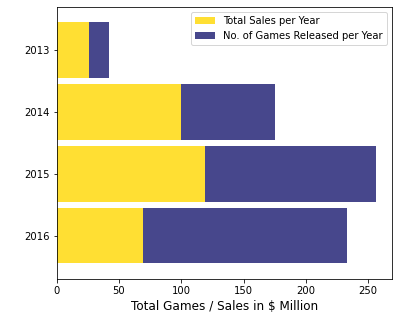

PS4's first year of sales was 2013, while its last year of sales was 2016 - all in all, PS4's had a life span of 
4 years. In its life span, PS4 generated a total of $314.14 Million in sales with a total of 392 games released. 
Its highest annual sales was $118.9 Million and the sales it generated per year were, on avarege, about $78.53
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~

XOne's Distribution of Games and Sales per Year


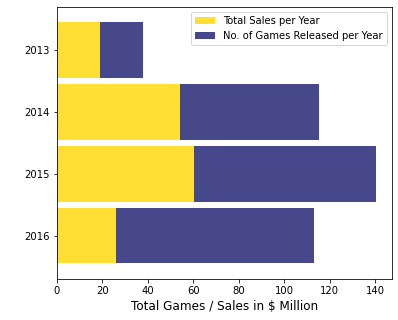

XOne's first year of sales was 2013, while its last year of sales was 2016 - all in all, XOne's had a life span of 
4 years. In its life span, XOne generated a total of $159.32 Million in sales with a total of 247 games released. 
Its highest annual sales was $60.14 Million and the sales it generated per year were, on avarege, about $39.83
Million.

-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~



In [120]:
print("The Overall Distribution of Sales of Each Platform Per Year:")
select = games.query('platform == ["DS", "GBA", "PS", "PS2", "XB", "3DS", "PS3", "PS4", "X360", "XOne", "Wii"]')
select.pivot_table(index='platform', columns=['year_of_release'],values = 'total_sales_in_millions',aggfunc='sum', fill_value=0).sort_values(by='platform', ascending=False).plot(figsize=(10,7), stacked=True,alpha=0.8, align='center', width = 0.85,kind='bar', 
                                                                                                         color=sns.color_palette('Spectral', 25))

plt.title('Total Sales per Year of Top Platforms',fontsize=12)
plt.xlabel('Platform Names',fontsize=12)
plt.ylabel('Sales in $ Million',fontsize=12)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title="Year of Release", fontsize=10, title_fontsize=12)
plt.tick_params(rotation='auto',axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show()

print('^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^')
print()
select_platforms=["DS", "GBA", "PS", "PS2", "XB", "Wii", "PS3", "X360", "3DS", "PS4", "XOne"]

print("Let's Check Each Platform's Story More Closely:")
print()
for p in select_platforms:
    platform=games.query('platform=="{}"'.format(p)).pivot_table(index='year_of_release', values='total_sales_in_millions', aggfunc=['sum', 'count']).sort_values('year_of_release', ascending=False)
    platform.columns=['Total Sales per Year','No. of Games Released per Year']
    release_year=platform.index.min()
    last_year=platform.index.max()
    life_span=last_year-release_year+1
    peak_sales=round(platform['Total Sales per Year'].max(), 2)
    mean_sales=round(platform['Total Sales per Year'].mean(), 2)
    total_sales=round(platform['Total Sales per Year'].sum(), 2)
    total_games=round(platform['No. of Games Released per Year'].sum(), 2)
    print("{}'s Distribution of Games and Sales per Year".format(p))
    platform.plot.barh(figsize=(6,5), stacked=True,width = 0.9, alpha= 0.8, color = ("gold","midnightblue"))
    plt.xlabel('Total Games / Sales in $ Million',fontsize=12)
    plt.ylabel(' ',fontsize=12)
    plt.legend(loc='upper right', fontsize=10, title_fontsize=12)
    plt.show()
    print("""{}'s first year of sales was {}, while its last year of sales was {} - all in all, {}'s had a life span of \n{} years. In its life span, {} generated a total of ${} Million in sales with a total of {} games released. 
Its highest annual sales was ${} Million and the sales it generated per year were, on avarege, about ${}\nMillion.""".format(p, release_year, last_year, p, life_span, p, total_sales, total_games, peak_sales, mean_sales))
    print()
    print('-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~')
    print()


As noted in the previous section a platform's average life span is approx. 8-10 years (there are some exceptions to every rule, of course). Studying the selected platforms detailed above, we can see that it takes a platform 3-4 years to reach peak sales, then it usually generates its highest sales for about 3 years and then the sales decline until it is usually replaced with a more advanced platform. 

To conclude, in this section we took a closer look at some of the faded/fading platforms, some that seem to have reached their peak and what we mights call "emerging" platforms, platforms that are starting to generate greater popularity and greater sales per year. 

Platforms DS (a console that was initially released in 1985, then redesigned and released in 2004), GBA, PS, PS2 and XB used to be very popular platforms but by 2016 they have completely faded and they don't generate any sales.

Next, we have platforms 3DS, PS3, X360 and Wii - four platforms that were very popular, generated sales, and are still selling games in 2016 (very little compared with previous sales or barely any sales) but are in steady decline. 

Last but not least, we have PS4 and Xone that have only been in the market for 4 years, their sales are climbing and if you take into consideration that perhaps the data for 2016 is incomplete - they might generate even more sales by year's end - these are our emerging platforms, since they are yet to peak. 

### Core Parameters - Sample Period
 
As noted above, it takes a platform about 3-4 years to peak in sales. Then, the platform generates higher sales (sometimes its highest sales) for approx. 3 years until the decline in sales starts, until they fade completely and the platform is replaced with a newer version or a competitive platform. 

Thus, I believe that a sample period beginning in 2011 may afford us a better look of the platforms currently on the market - especially their future and taking into account the perhaps the data for 2016 is incomplete. 

In [121]:
sample_data = games.query('year_of_release >= 2011')

In [122]:
sample_data.describe(include='all').fillna('N/A').T

count unique                       top  freq  \
name                       4051   2418  LEGO Marvel Super Heroes     9   
platform                   4051     12                       PS3   712   
year_of_release          4051.0    N/A                       N/A   N/A   
genre                      4051     12                    Action  1287   
na_sales                 4051.0    N/A                       N/A   N/A   
eu_sales                 4051.0    N/A                       N/A   N/A   
jp_sales                 4051.0    N/A                       N/A   N/A   
other_sales              4051.0    N/A                       N/A   N/A   
critic_score             2264.0    N/A                       N/A   N/A   
user_score               2340.0    N/A                       N/A   N/A   
rating                     4051      7                       N/A  1533   
total_sales_in_millions  4051.0    N/A                       N/A   N/A   
release_decade             4051      1                 2010-2016  4051   

                                mean        std     min     25%     50%  \
name                             N/A        N/A     N/A     N/A     N/A   
platform                         N/A        N/A     N/A     N/A     N/A   
year_of_release          2013.081955   1.775609  2011.0  2011.0  2013.0   
genre                            N/A        N/A     N/A     N/A     N/A   
na_sales                    0.205774   0.568632     0.0     0.0    0.04   
eu_sales                    0.166198   0.481296     0.0     0.0    0.03   
jp_sales                    0.060704   0.219533     0.0     0.0     0.0   
other_sales                 0.051812   0.154835     0.0     0.0    0.01   
critic_score               71.296378  13.435985    13.0    64.0    74.0   
user_score                  6.637137   1.545271     0.2     5.8     7.0   
rating                           N/A        N/A     N/A     N/A     N/A   
total_sales_in_millions     0.484488   1.215573    0.01    0.04    0.13   
release_decade                   N/A        N/A     N/A     N/A     N/A   

                            75%     max  
name                        N/A     N/A  
platform                    N/A     N/A  
year_of_release          2015.0  2016.0  
genre                       N/A     N/A  
na_sales                   0.17    9.66  
eu_sales                   0.13    9.09  
jp_sales                   0.05    4.39  
other_sales                0.04    3.96  
critic_score               81.0    97.0  
user_score                  7.8     9.3  
rating                      N/A     N/A  
total_sales_in_millions     0.4   21.05  
release_decade              N/A     N/A

I created a slice of data consisting of only games released from 2011 until 2016 and printed its distribution - there are 2418 games, 12 platforms (PS3 is the most frequent) and 12 genres. 

In [123]:
sample_data.sample(10)

name platform  \
8765                                          DiRT 3       PC   
5003               Raving Rabbids: Travel in Time 3D      3DS   
2440                         Tekken Tag Tournament 2      PS3   
10194                   Shin Sangoku Musou 6 Special      PSP   
10696  Harry Potter and the Deathly Hallows - Part 2       PC   
15872                                     Dunamis 15     X360   
16362                            Crows: Burning Edge      PS4   
14525     Kaidan Restaurant: Zoku! Shin Menu 100-Sen       DS   
5104                         Tiger Woods PGA Tour 14      PS3   
537                    Skylanders: Spyro's Adventure      Wii   

       year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
8765              2011     Racing      0.00      0.13      0.00         0.03   
5003              2011   Platform      0.11      0.23      0.00         0.04   
2440              2012   Fighting      0.28      0.31      0.13         0.13   
10194             2011     Action      0.00      0.00      0.11         0.00   
10696             2011     Action      0.05      0.04      0.00         0.01   
15872             2011  Adventure      0.00      0.00      0.02         0.00   
16362             2016     Action      0.00      0.00      0.01         0.00   
14525             2011       Misc      0.00      0.00      0.03         0.00   
5104              2013     Sports      0.16      0.14      0.00         0.07   
537               2011     Action      1.35      1.13      0.00         0.30   

       critic_score  user_score rating  total_sales_in_millions release_decade  
8765           86.0         6.9      T                     0.16      2010-2016  
5003            NaN         NaN    N/A                     0.38      2010-2016  
2440           82.0         8.2      T                     0.85      2010-2016  
10194           NaN         NaN    N/A                     0.11      2010-2016  
10696          43.0         5.0      T                     0.10      2010-2016  
15872           NaN         NaN    N/A                     0.02      2010-2016  
16362           NaN         NaN    N/A                     0.01      2010-2016  
14525           NaN         NaN    N/A                     0.03      2010-2016  
5104           74.0         3.8      E                     0.37      2010-2016  
537            81.0         5.6   E10+                     2.78      2010-2016

Above, I printed a sample of the data slice of the chosen sample period.

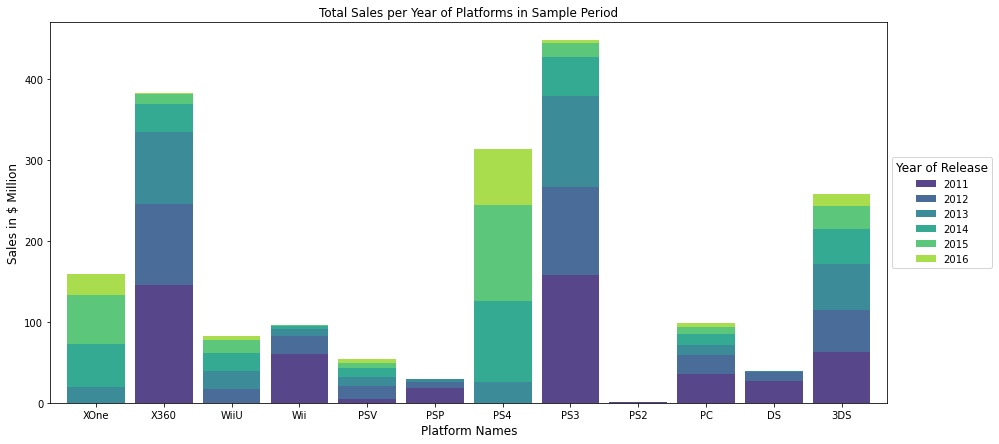

Sales' Dynamics in Sample Period 
 
 
 year_of_release 
 2011 
 2012 
 2013 
 2014 
 2015 
 2016 
 
 
 platform 
 
 
 
 
 
 
 
 
 
 
 XOne 
 0.00 
 0.00 
 18.96 
 35.11 
 6.07 
 -33.99 
 
 
 X360 
 145.23 
 -44.51 
 -12.14 
 -53.84 
 -22.78 
 -10.44 
 
 
 WiiU 
 0.00 
 17.56 
 4.09 
 0.38 
 -5.68 
 -11.75 
 
 
 Wii 
 59.79 
 -36.85 
 -14.35 
 -4.84 
 -2.61 
 -0.96 
 
 
 PSV 
 4.63 
 11.56 
 -5.60 
 1.31 
 -5.65 
 -2.00 
 
 
 PSP 
 17.82 
 -9.87 
 -4.57 
 -3.14 
 -0.12 
 -0.12 
 
 
 PS4 
 0.00 
 0.00 
 25.99 
 74.01 
 18.90 
 -49.65 
 
 
 PS3 
 157.98 
 -49.71 
 4.98 
 -65.49 
 -30.94 
 -13.22 
 
 
 PS2 
 0.45 
 -0.45 
 0.00 
 0.00 
 0.00 
 0.00 
 
 
 PC 
 35.16 
 -11.71 
 -10.44 
 0.27 
 -4.76 
 -3.27 
 
 
 DS 
 26.33 
 -14.66 
 -10.13 
 -1.54 
 0.00 
 0.00 
 
 
 3DS 
 63.20 
 -11.44 
 4.81 
 -12.81 
 -15.98 
 -12.64

In [124]:
sample_data_pivot = sample_data.pivot_table(index='platform', columns=['year_of_release'],values = 'total_sales_in_millions',aggfunc='sum', fill_value=0).sort_values(by='platform', ascending=False)
sample_data_pivot.plot(figsize=(15,7), stacked=True,alpha=0.9, align='center', width = 0.85,kind='bar', 
                                                                                                         color=sns.color_palette('viridis', 6))
plt.title('Total Sales per Year of Platforms in Sample Period',fontsize=12)
plt.xlabel('Platform Names',fontsize=12)
plt.ylabel('Sales in $ Million',fontsize=12)
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5), title="Year of Release", fontsize=10, title_fontsize=12)
plt.tick_params(rotation='auto',axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show()
sample_data_shift = sample_data_pivot - sample_data_pivot.shift(+1, axis=1, fill_value=0)
display_side_by_side(sample_data_shift,titles=["Sales' Dynamics in Sample Period"])


From the the graph above we can see that the highest selling platforms in our sample period are PS3, X360, PS4 and 3DS. 

However, from the distribution of each platform's sales between the years 2011-2016, we can see that PS3's sales have already declined dramatically. In 2011 it recorded approx. $158 Million in sales, but by 2016 its sales dropped to a fraction of what they were. The sales of X360, took a similar turn by 2016. 3DS, the fourth most profitable platform is also in decline. 

Other platforms that are declining in sales are PSV and Wii, while DS, PS2 and PSP have no recorded sales by 2016 (some even before that). PC is an exception, even though its sales are also in decline by 2016 - there seems to always be a market for PC games, it has been around for 31 years. Probably because these are games for a platform most people already have and they don't need to buy a new console.  

On the end of the spectrum, PS4 seem to be reaching its first peak, it is the third most profitable platform in our sample period, it has been on the market for 3-4 years and has steady sales going into 2016. Also XOne and WiiU are generating sales in 2016, they are also potentially profitable going into 2017 (XOne more so than WiiU).  

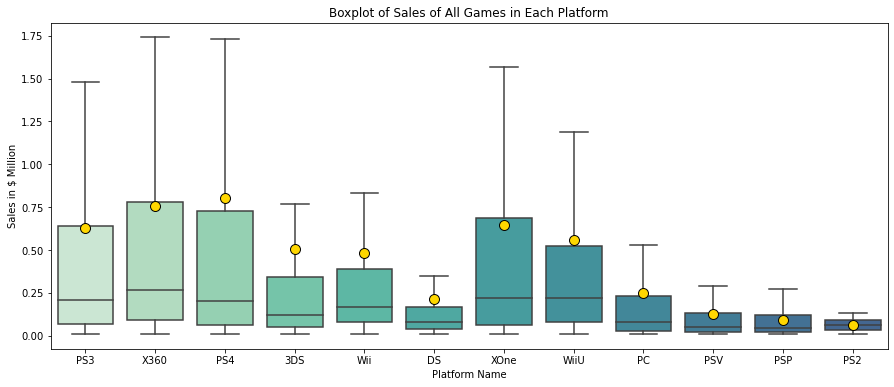

In [125]:
plt.figure(figsize=(15,6))
sns.boxplot(x="platform", y="total_sales_in_millions",showfliers=False, palette=sns.color_palette('mako_r', 20), showmeans=True, meanprops={"marker": "o",
                       "markerfacecolor":"gold", 
                       "markeredgecolor":"black",
                       "markersize": "10"}, data=sample_data)
plt.ylabel('Sales in $ Million')
plt.xlabel('Platform Name')
plt.title('Boxplot of Sales of All Games in Each Platform')
plt.show()



From the boxplot above, we can see that, even though PS3, X360, PS4 and 3DS are the most profitable platforms in our sample period, X360 games generate the highest sales per game, they have the higher 1st quartile, median and 3rd quartile of the three (even though it generated less sales than PS3) - while the games for PS3, the most profitable platform in the sample period, generated the lowest sales per game (out of the top 5 - X360, PS4, XOne, PS3 and WiiU).

We should also note that our three potentially profitable platforms are all in the top 5 platforms who generate the highest sales per game. Taking into account that the other two platforms' sales dropped almost completely by 2016, this enhances the assumption that these three platforms are the most potentially profitable going forward. 

The sales per game for 3DS, the fourth most profitable platform in the sample period, are 7th.  

When we examine the average sales per game of each platform - PS4 has the highest average sales per game, than X360, XOne, PS3, WiiU, 3DS and Wii. 


#### Studying Correlation of Games' Sales and Reviews

In [126]:
ps4_data = sample_data[['name','platform','total_sales_in_millions', 'critic_score', 'user_score']].query('platform == ["PS4"]')
ps4_data.describe(include='all').fillna('N/A').T

count unique                        top freq  \
name                       392    392  Call of Duty: Black Ops 3    1   
platform                   392      1                        PS4  392   
total_sales_in_millions  392.0    N/A                        N/A  N/A   
critic_score             285.0    N/A                        N/A  N/A   
user_score               290.0    N/A                        N/A  N/A   

                             mean        std   min   25%   50%   75%    max  
name                          N/A        N/A   N/A   N/A   N/A   N/A    N/A  
platform                      N/A        N/A   N/A   N/A   N/A   N/A    N/A  
total_sales_in_millions  0.801378   1.609456  0.01  0.06   0.2  0.73  14.63  
critic_score             72.72807  12.488893  19.0  67.0  74.0  81.0   97.0  
user_score               6.811897   1.451334   1.5   6.2   7.1   7.9    9.2

For the purpose of examining how critic and user reviews affect sales, I chose the platform PS4 and created a data slice of the data of the sample period with the relevant columns: name, platform, total_sales_in_millions, critic_score and user_score. 

From the table above, we can see that this data slice has one platform, 392 games, 285 recorded critics' reviews and 290 recorded users' reviews. 

Correlation of Sales with Reviews 
 
 
 
 total_sales_in_millions 
 critic_score 
 user_score 
 
 
 
 
 total_sales_in_millions 
 1.000000 
 0.390890 
 -0.020862 
 
 
 critic_score 
 0.390890 
 1.000000 
 0.570418 
 
 
 user_score 
 -0.020862 
 0.570418 
 1.000000

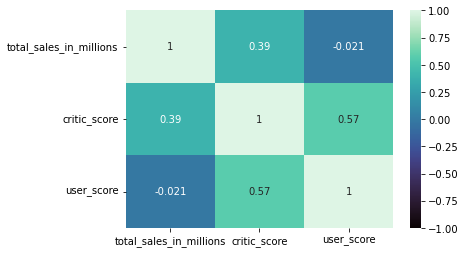


From the table and the heatmap above, we can see that there is strong correlation between critics' reviews and games' sales and even stronger correlation between critics' reviews and users' reviews. However, there is no correlation 
between users' reviews and games' sales. The relationship between the reviews and games' sales will also be 
demonstrated in the scatterplot below:



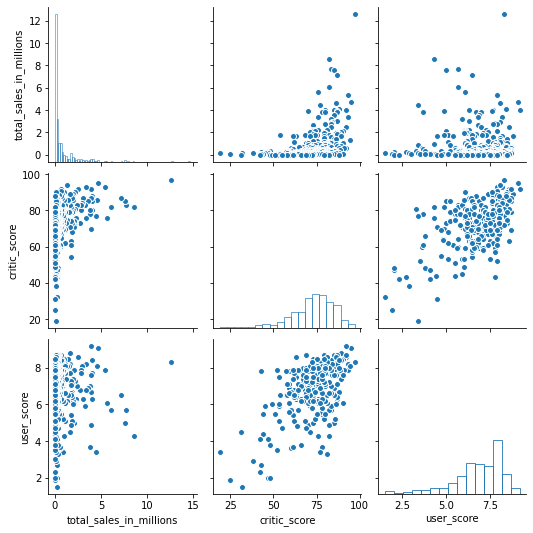

In [127]:
display_side_by_side(ps4_data.corr(), titles=["Correlation of Sales with Reviews"])
sns.heatmap(ps4_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'mako')
plt.show()
print()
print("From the table and the heatmap above, we can see that there is strong correlation between critics' reviews and games' sales and even stronger correlation between critics' reviews and users' reviews. However, there is no correlation \nbetween users' reviews and games' sales. The relationship between the reviews and games' sales will also be \ndemonstrated in the scatterplot below:")
print()
sns.pairplot(ps4_data,plot_kws=dict(marker="o", linewidth=1),diag_kws=dict(fill=False))
plt.show()

In the scatterplot above, we can see that there are some outliers in the data slice, e.g., a game that generated more than $10 Million in sales or games with very low reviews (either critics' or users'). In addition, the correlation between the reviews and the games' sales (or lack there of) is also visible: as the critics' reviews are higher - a game generated higher sales and better reviews from the users. However, no such relationship exists between the games users' reviews and their sales. 


#### Studying a Select Number of Games Across Platforms 

For the purpose of studying the distribution of certain games across the platforms in the sample period, I will create a list of the games in the PS4 platform data slice and then create a table that only has the games that were released on PS4 on other platforms. 

In [128]:
ps4_games=ps4_data['name'].unique()

In [129]:
filtered_data = sample_data.query('name in @ps4_games').sort_values(by='name')
filtered_data.describe(include='all').fillna('N/A').T


count unique                       top  freq  \
name                       1160    392  LEGO Marvel Super Heroes     9   
platform                   1160     11                       PS4   392   
year_of_release          1160.0    N/A                       N/A   N/A   
genre                      1160     12                    Action   438   
na_sales                 1160.0    N/A                       N/A   N/A   
eu_sales                 1160.0    N/A                       N/A   N/A   
jp_sales                 1160.0    N/A                       N/A   N/A   
other_sales              1160.0    N/A                       N/A   N/A   
critic_score              895.0    N/A                       N/A   N/A   
user_score                908.0    N/A                       N/A   N/A   
rating                     1160      5                         M   314   
total_sales_in_millions  1160.0    N/A                       N/A   N/A   
release_decade             1160      1                 2010-2016  1160   

                                mean        std     min     25%     50%  \
name                             N/A        N/A     N/A     N/A     N/A   
platform                         N/A        N/A     N/A     N/A     N/A   
year_of_release          2014.786207   1.108045  2011.0  2014.0  2015.0   
genre                            N/A        N/A     N/A     N/A     N/A   
na_sales                    0.287578   0.683921     0.0    0.01    0.06   
eu_sales                    0.270767   0.665388     0.0    0.01    0.07   
jp_sales                    0.031784   0.081888     0.0     0.0     0.0   
other_sales                 0.085914   0.221554     0.0     0.0    0.02   
critic_score               73.931844  12.458807    19.0    69.0    76.0   
user_score                  6.543557   1.624577     0.2     5.7     6.9   
rating                           N/A        N/A     N/A     N/A     N/A   
total_sales_in_millions     0.676043   1.503612    0.01    0.06    0.19   
release_decade                   N/A        N/A     N/A     N/A     N/A   

                            75%     max  
name                        N/A     N/A  
platform                    N/A     N/A  
year_of_release          2016.0  2016.0  
genre                       N/A     N/A  
na_sales                   0.27    9.66  
eu_sales                   0.23    9.09  
jp_sales                   0.03    0.98  
other_sales                0.07    3.96  
critic_score               82.0    97.0  
user_score                  7.8     9.3  
rating                      N/A     N/A  
total_sales_in_millions  0.6325   21.05  
release_decade              N/A     N/A

I printed a description of the filtered data, we can see that it has 392 games and 11 platforms.

In [130]:
games_pivot = filtered_data.pivot_table(index='name',values = 'platform', aggfunc='count').sort_values(by='platform', ascending=False).reset_index()
games_sample = games_pivot.query('platform >= 8')
games_sample.T


0        1        2                3  \
name      LEGO Marvel Super Heroes  FIFA 14  FIFA 15  LEGO The Hobbit   
platform                         9        9        8                8   

                              4                             5         6  \
name      Angry Birds Star Wars  Lego Batman 3: Beyond Gotham  Terraria   
platform                      8                             8         8   

                                 7                    8  
name      The LEGO Movie Videogame  LEGO Jurassic World  
platform                         8                    8

Of the filtered data, I located 8 games that were released on 8 platforms or more.

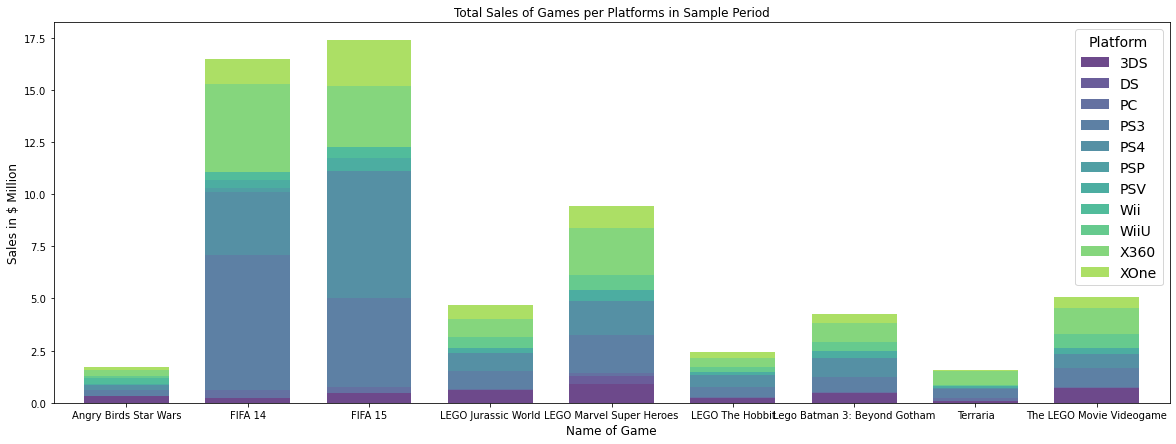

platform                       3DS    DS    PC   PS3   PS4   PSP   PSV   Wii  \
name                                                                           
Angry Birds Star Wars         0.33  0.00  0.00  0.29  0.22  0.00  0.08  0.26   
FIFA 14                       0.23  0.00  0.40  6.46  3.01  0.19  0.41  0.38   
FIFA 15                       0.46  0.00  0.29  4.28  6.08  0.00  0.60  0.56   
LEGO Jurassic World           0.62  0.00  0.04  0.85  0.90  0.00  0.23  0.00   
LEGO Marvel Super Heroes      0.89  0.38  0.17  1.83  1.62  0.00  0.51  0.00   
LEGO The Hobbit               0.24  0.00  0.05  0.46  0.60  0.00  0.14  0.00   
Lego Batman 3: Beyond Gotham  0.45  0.00  0.06  0.73  0.92  0.00  0.31  0.00   
Terraria                      0.09  0.00  0.14  0.41  0.07  0.00  0.10  0.00   
The LEGO Movie Videogame      0.69  0.00  0.06  0.93  0.67  0.00  0.30  0.00   

platform                      WiiU  X360  XOne  
name                                            
Angry Birds Star Wars         0.10  0.28  0.17  
FIFA 14                       0.00  4.22  1.16  
FIFA 15                       0.00  2.92  2.18  
LEGO Jurassic World           0.52  0.87  0.66  
LEGO Marvel Super Heroes      0.74  2.22  1.05  
LEGO The Hobbit               0.22  0.45  0.27  
Lego Batman 3: Beyond Gotham  0.46  0.89  0.44  
Terraria                      0.03  0.68  0.04  
The LEGO Movie Videogame      0.64  1.27  0.53

In [131]:
games_list = games_sample['name'].unique()
filtered_games = filtered_data.query('name in @games_list')
filtered_games.pivot_table(index='name', columns=['platform'],values = 'total_sales_in_millions',aggfunc='sum', fill_value=0).plot(figsize=(20,7),alpha=0.8,align='center', stacked=True,width = 0.7,kind='bar', 
                                                                                                         color=sns.color_palette('viridis', 12))
plt.title('Total Sales of Games per Platforms in Sample Period',fontsize=12)
plt.xlabel('Name of Game',fontsize=12)
plt.ylabel('Sales in $ Million',fontsize=12)
plt.legend(loc='best', title="Platform", fontsize=14, title_fontsize=14)
plt.tick_params(rotation='auto',axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show()
display(filtered_games.pivot_table(index='name', columns=['platform'],values = 'total_sales_in_millions',aggfunc='sum', fill_value=0))


As we can see, the two games which generated the highest sales are FIFA 14 and FIFA 15. However, FIFA 14 released on PS3 generated the most sales and FIFA 15 on PS4. For those two games, this trend is the same for X360 and XOne - FIFA 14 generated higher sales on X360 than FIFA 15 and FIFA 15 generated higher sales on XOne than FIFA 14. On the other hand, all the other 6 games that were selected generated much lower sales, and the distribution between PS3, X360 and PS4 is fairly even.  

#### Studying Distribution of Sales Across Genres

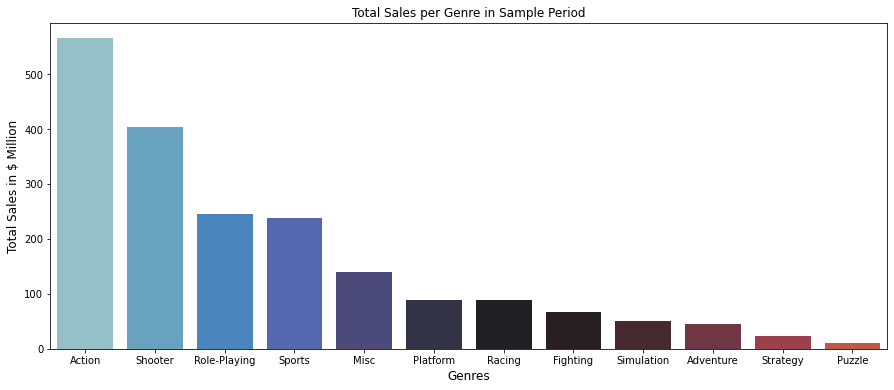

No. of Games  Sales' Average  Sales per Genre in $ Million
genre                                                                   
Action              1287.0           0.439                        565.22
Adventure            410.0           0.110                         45.04
Fighting             159.0           0.421                         66.90
Misc                 382.0           0.366                        139.91
Platform             122.0           0.727                         88.68
Puzzle                71.0           0.139                          9.85
Racing               180.0           0.491                         88.31
Role-Playing         465.0           0.528                        245.63
Shooter              332.0           1.214                        402.96
Simulation           136.0           0.370                         50.26
Sports               389.0           0.610                        237.39
Strategy             118.0           0.191                         22.51

In [132]:
genre_pivot = sample_data.pivot_table(index='genre',values = 'total_sales_in_millions',aggfunc='sum').reset_index().sort_values(by='total_sales_in_millions', ascending=False)
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x='genre',y="total_sales_in_millions", palette=sns.color_palette('icefire', 14), data=genre_pivot)
plt.title('Total Sales per Genre in Sample Period',fontsize=12)
plt.xlabel('Genres',fontsize=12)
plt.ylabel('Total Sales in $ Million',fontsize=12)
plt.tick_params(rotation="auto",axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show() 
display(sample_data.pivot_table(columns='genre',values='total_sales_in_millions', aggfunc=('count', 'sum', 'mean')).round(3).rename(index={'count': 'No. of Games', 'sum':'Sales per Genre in $ Million', 'mean':"Sales' Average"}).T)


From the distribution above, we can see that most of the games released in the sample period were Action games and that that genre generated the highest sales, more than $550 Million. Next are Shooter games, Role Playing and Sports. However, Shooter genre (with the second highest sales generated) has almost three times the average sales of the Action genre, the second highest average of sales was generated by the Platform genre, followed by Sports - while Action is fifth (despite having the most games released and generating the highest sales). 

#### Conclusion

In this section we explored the data for the years 2011-2016, our "sample period", assuming that they may best assist in drawing conclusions on platforms' potential profitability. 

I found that sometimes looks may be deceiving - even though PS3, X360, PS4 and 3DS are the most profitable platforms in our sample period, X360 games generate the highest sales per game, they have the higher 1st quartile, median and 3rd quartile of the three (even though it generated less sales than PS3) - while the games for PS3, the most profitable platform in the sample period, generated the lowest sales per game (out of the top 5 - X360, PS4, XOne, PS3 and WiiU). PS4 has the highest average sales per game, then X360, XOne, PS3, WiiU, 3DS and Wii.

Using the data for the PS4 platform, I studied the correlation between sales and reviews, concluding that as the critics' reviews are higher - a game generated higher sales and better reviews from the users. However, no such relationship exists between the games users' reviews and their sales. 

I studied 8 games that were sold on 8 platforms or more, the sales they generated and how they differed from platform to platform and the most profitable genres. 

I found that most of the games released in the sample period were Action games and that that genre generated the highest sales. Next are Shooter games, Role Playing and Sports. 

However, Shooter genre (with the second highest sales generated) has almost three times the average sales of the Action genre, the second highest average of sales was generated by the Platform genre, followed by Sports - while Action is fifth (despite having the most games released and generating the highest sales).

## User Profile per Region

Now that the data has been preprocessed and its core parameters studied, I will examine the sales across in the 3 main regions of sales: North America, Europe and Japan. 


### Comparing Main Regions by Platform

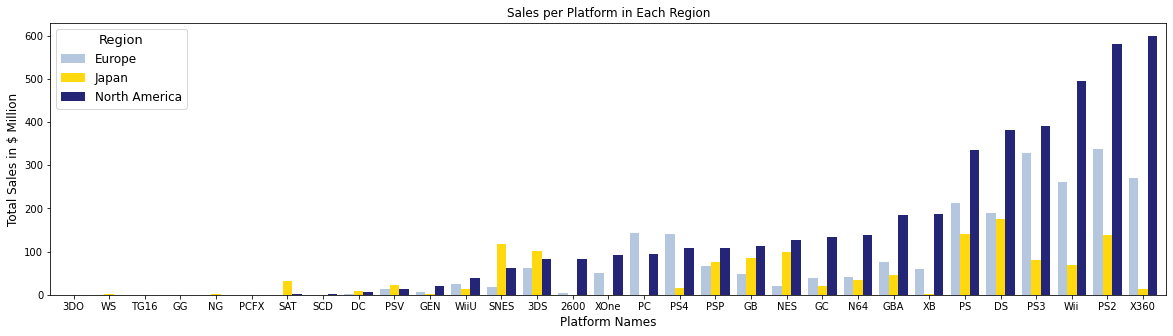

Platforms' Regional Sales 
 
 
 
 Europe 
 Japan 
 North America 
 
 
 platform 
 
 
 
 
 
 
 
 X360 
 269.79 
 12.33 
 599.15 
 
 
 PS2 
 337.05 
 137.74 
 580.09 
 
 
 Wii 
 261.48 
 69.05 
 494.01 
 
 
 PS3 
 328.96 
 79.52 
 391.60 
 
 
 DS 
 188.72 
 175.02 
 381.38 
 
 
 PS 
 212.39 
 139.78 
 334.72 
 
 
 XB 
 60.72 
 1.38 
 185.91 
 
 
 GBA 
 74.82 
 46.56 
 184.73 
 
 
 N64 
 41.06 
 34.05 
 139.02 
 
 
 GC 
 38.71 
 21.34 
 133.43 
 
 
 NES 
 21.15 
 98.65 
 125.94 
 
 
 GB 
 47.51 
 85.12 
 113.64 
 
 
 PSP 
 66.68 
 76.38 
 109.09 
 
 
 PS4 
 141.09 
 15.96 
 108.74 
 
 
 PC 
 142.16 
 0.17 
 94.23 
 
 
 XOne 
 51.59 
 0.34 
 93.12 
 
 
 2600 
 5.00 
 0.00 
 83.14 
 
 
 3DS 
 61.46 
 100.64 
 83.11 
 
 
 SNES 
 19.04 
 116.55 
 61.23 
 
 
 WiiU 
 25.13 
 13.01 
 38.10 
 
 
 GEN 
 5.52 
 2.67 
 19.27 
 
 
 PSV 
 13.07 
 21.84 
 12.47 
 
 
 DC 
 1.69 
 8.56 
 5.43 
 
 
 SCD 
 0.36 
 0.45 
 1.00 
 
 
 SAT 
 0.54 
 32.26 
 0.72 
 
 
 WS 
 0.00 
 1.42 
 0.00 
 
 
 PCFX 
 0.00 
 0.03 
 0.00 
 
 
 NG 
 0.00 
 1.44 
 0.00 
 
 
 GG 
 0.00 
 0.04 
 0.00 
 
 
 TG16 
 0.00 
 0.16 
 0.00 
 
 
 3DO 
 0.00 
 0.10 
 0.00

In [133]:
region_platform_pivot = games.pivot_table(index='platform', values = ['na_sales', 'eu_sales', 'jp_sales'],aggfunc=('sum')).sort_values(['na_sales'], ascending=True)
region_platform_pivot.columns = ['Europe', 'Japan', 'North America']
region_platform_pivot.plot(figsize=(20,5),alpha=0.95, align='center', width = 0.8,kind='bar', 
                                                                                                         color = ("lightsteelblue", "gold", "midnightblue"))
 
plt.title('Sales per Platform in Each Region',fontsize=12)
plt.xlabel('Platform Names',fontsize=12)
plt.ylabel('Total Sales in $ Million',fontsize=12)
plt.legend(title="Region", loc='best',fontsize=12, title_fontsize=13)
plt.tick_params(rotation='auto',axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show() 
display_side_by_side(region_platform_pivot.sort_values('North America', ascending=False), titles=["Platforms' Regional Sales"])


As we can see from the graph above, the top five platforms in North America are X360, PS2, Wii, PS3 and DS - these are also the platforms that generated the highest sales overall. In Europe the top 5 platforms are quite similar - PS2, PS3, X360, Wii and PS. 

Japan beats to a different drum - first of all, the region generates the lowest sales of the three main regions. In addition, that region's top platforms are DS, PS, PS2, SNES and 3DS.  

### Comparing Main Regions by Genre

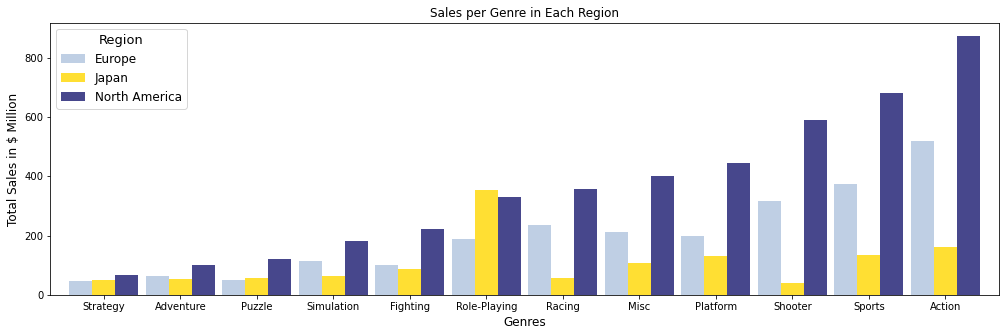

Regional Sales by Genres 
 
 
 genre 
 Action 
 Sports 
 Shooter 
 Platform 
 Misc 
 Racing 
 Role-Playing 
 Fighting 
 Simulation 
 Puzzle 
 Adventure 
 Strategy 
 
 
 
 
 Europe 
 517.58 
 375.59 
 316.96 
 199.87 
 211.32 
 235.47 
 188.30 
 99.19 
 113.37 
 49.82 
 63.22 
 45.00 
 
 
 Japan 
 160.15 
 135.27 
 38.70 
 130.71 
 108.04 
 56.64 
 353.88 
 87.28 
 63.64 
 56.68 
 52.24 
 49.33 
 
 
 North America 
 873.70 
 681.69 
 590.35 
 444.44 
 401.69 
 357.90 
 330.12 
 221.20 
 180.85 
 121.69 
 101.52 
 68.12

In [134]:
region_genre_pivot = games.pivot_table(index='genre', values = ['na_sales', 'eu_sales', 'jp_sales'],aggfunc=('sum')).sort_values(['na_sales'], ascending=True)
region_genre_pivot.columns = ['Europe', 'Japan', 'North America']
region_genre_pivot.plot(figsize=(17,5),alpha=0.8, align='center', width = 0.9,kind='bar', 
                                                                                                         color = ("lightsteelblue", "gold", "midnightblue"))
plt.title('Sales per Genre in Each Region',fontsize=12)
plt.xlabel('Genres',fontsize=12)
plt.ylabel('Total Sales in $ Million',fontsize=12)
plt.legend(title="Region", loc='best',fontsize=12, title_fontsize=13)
plt.tick_params(rotation='auto',axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show() 
display_side_by_side(region_genre_pivot.sort_values('North America', ascending=False).T, titles=["Regional Sales by Genres"])

The 5 most profitable genres in North America are Action, Sports, Shooter, Platform and Misc. In Europe, the 5 most profitable genres are Action, Sports, Shooter, Racing and Misc - very similar to those in North America with one exception. 

Again, In Japan the most profitable genre is unique to the other regions, it's not even in their top 5 genres: Role-Playing. The other four most profitable genres are similar to those in North America - Action, Sports, Platform and Misc. It should also be noted that Shooter is the least profitable genre in the region. 

### Comparing Main Regions by ESRB ratings


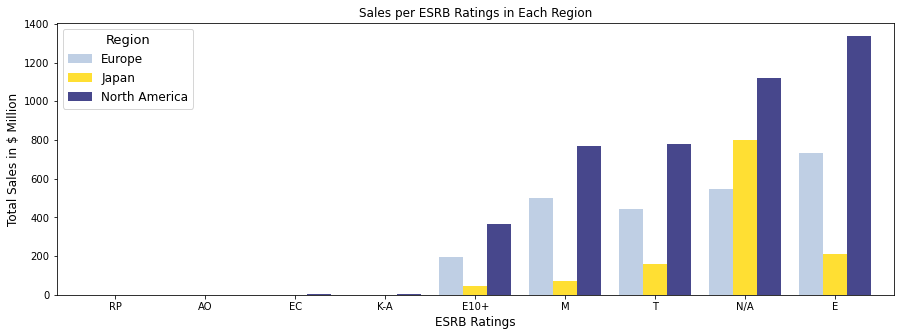

Distribution of Regional Sales by ESRB Ratings 
 
 
 rating 
 E 
 N/A 
 T 
 M 
 E10+ 
 K-A 
 EC 
 AO 
 RP 
 
 
 
 
 Europe 
 732.54 
 544.34 
 441.60 
 500.91 
 195.25 
 0.29 
 0.11 
 0.61 
 0.04 
 
 
 Japan 
 210.99 
 800.42 
 160.42 
 71.73 
 47.51 
 1.49 
 0.00 
 0.00 
 0.00 
 
 
 North America 
 1337.72 
 1120.87 
 777.16 
 768.07 
 363.56 
 2.59 
 2.04 
 1.26 
 0.00

The ESRB Ratings that generated the highest sales in North America are E, T, M, E10+ and K-A (a rating that was in 
use between 1994-1998). In Europe, the ESRB Ratings that generated the highest sales are E, M, T, E10+ and AO - very similar to North America except for second, third and fifth places. 

In Japan, the top 5 ratings are like those in North America but overall the sales they generated are significantly 
lower.


N/A ESRB Rating Sales' Distribution 
 
 
 
 Europe 
 Japan 
 North America 
 
 
 
 mean 
 sum 
 mean 
 sum 
 mean 
 sum 
 
 
 rating 
 
 
 
 
 
 
 
 
 
 
 N/A 
 0.087 
 544.34 
 0.128 
 800.42 
 0.179 
 1120.87

However, taking into account that out of 16566 games in the whole data frame, only two thirds of games have ratings (10304) and the fact that those games without ratings generated the highest sales in Japan and the second highest
sales in North America and in Europe, that in general ESRB Ratings do not affect sales in the three main regions,
especially in Japan.


In [135]:
region_rating_pivot = games.pivot_table(index='rating', values = ['na_sales', 'eu_sales', 'jp_sales'],aggfunc=('sum')).sort_values(['na_sales', 'eu_sales', 'jp_sales'], ascending=True)
region_rating_pivot.columns = ['Europe', 'Japan', 'North America']
region_rating_pivot.plot(figsize=(15,5),alpha=0.8, align='center', width = 0.8,kind='bar', 
                                                                                                         color = ("lightsteelblue", "gold", "midnightblue"))
plt.title('Sales per ESRB Ratings in Each Region',fontsize=12)
plt.xlabel('ESRB Ratings',fontsize=12)
plt.ylabel('Total Sales in $ Million',fontsize=12)
plt.legend(title="Region", loc='best',fontsize=12, title_fontsize=13)
plt.tick_params(rotation='auto',axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show() 
display_side_by_side(region_rating_pivot.sort_values('North America', ascending=False).T, titles=["Distribution of Regional Sales by ESRB Ratings"])
print("""The ESRB Ratings that generated the highest sales in North America are E, T, M, E10+ and K-A (a rating that was in 
use between 1994-1998). In Europe, the ESRB Ratings that generated the highest sales are E, M, T, E10+ and AO - very similar to North America except for second, third and fifth places. 

In Japan, the top 5 ratings are like those in North America but overall the sales they generated are significantly 
lower.""")

display_side_by_side(games.query("rating=='N/A'").pivot_table(index="rating", values = ['na_sales', 'eu_sales', 'jp_sales'],aggfunc=('sum', 'mean')).round(3).rename(columns={'na_sales': "North America", 'eu_sales': "Europe", 'jp_sales': "Japan"}), titles=["N/A ESRB Rating Sales' Distribution"])


print("""However, taking into account that out of {} games in the whole data frame, only two thirds of games have ratings ({}) and the fact that those games without ratings generated the highest sales in Japan and the second highest\nsales in North America and in Europe, that in general ESRB Ratings do not affect sales in the three main regions,\nespecially in Japan.""".format(len(games), len(games)-6262))


#### Conclusion

Japan has an overall different gaming culture and ESRB Ratings do not affect sales.

## Testing the Hypotheses


In this report we shall test two hypotheses concerning the average users ratings:
1. The Platform Hypothesis - that there is no difference between the average users' ratings of the XOne platform and and those of PC.
2. The Genre Hypothesis - there is no difference between the average users' ratings of games in the Action genre and and those of the Sports genre.

### The Platform Hypothesis - Average User Ratings of XOne and PC

The null hypothesis (H0) is that there is no difference between the average users' ratings of the XOne platform and and those of PC. The alternative hypothesis (H1) is that the two platforms have a different average of users' ratings.

#### Distribution of Users' Ratings for Specific Platforms

Before I test the null hypothesis, I will review the distribution of the users' ratings of the two platforms. 

The Distribution of the Users' Ratings:


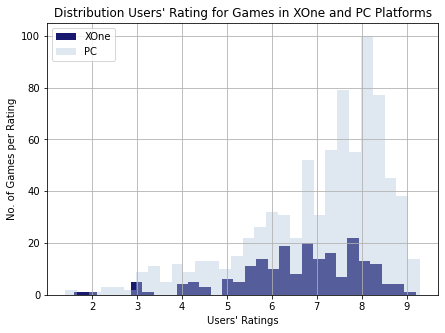


The Statistics of the Users' Rating:


count      mean       std       var
platform                                     
PC          788  7.062500  1.524928  2.325406
XOne        206  6.617233  1.376114  1.893689

In [136]:
plat_hypo = games.query('platform == ["XOne", "PC"]')
print("The Distribution of the Users' Ratings:")
plat_hypo.query('platform == "XOne"')['user_score'].hist(bins=30, figsize=(7,5), color = "midnightblue")
plat_hypo.query('platform == "PC"')['user_score'].hist(bins=30, figsize=(7,5), alpha=0.4,color = "lightsteelblue")                                                                                                       
plt.title("Distribution Users' Rating for Games in XOne and PC Platforms")
plt.xlabel("Users' Ratings")
plt.ylabel('No. of Games per Rating')
plt.legend(['XOne', 'PC'])
plt.show()
print()
print("The Statistics of the Users' Rating:")
display(plat_hypo.groupby(['platform'])['user_score'].agg(['count', 'mean', 'std', 'var']))


#### Testing the Platform Hypothsis

In [137]:
XOne=plat_hypo[(plat_hypo.platform=='XOne')&(plat_hypo.user_score.notna())]['user_score'].to_list()
PC=plat_hypo[(plat_hypo.platform=='PC')&(plat_hypo.user_score.notna())]['user_score'].to_list()

I created two lists of the users' ratings of each platform, discarding the null values that remained in the column. 

In [138]:
stat, p = levene(XOne, PC)
p<0.05

False

The Levene test tests for equal variances. Since in the test it is false that the alpha is greater than the p value, in the next step the "equal_var" will be set to "True".

In [139]:
stats.ttest_ind(PC, XOne,equal_var=True)

Ttest_indResult(statistic=3.8051313684232912, pvalue=0.00015040418604604744)

Above, I tested the statistics of the two lists, the difference between the averages of the two platforms is approx. 3.8. 

In [140]:
random_xone = sample(XOne,120)

random_pc = sample(PC,120)

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(random_xone,random_pc)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

print("XOne's average Users' ratings is {:.2f}".format(round(sum(XOne)/len(XOne),2)))
print("PC's average Users' ratings is {:.2f}".format(round(sum(PC)/len(PC),2)))

p-value:  0.0014530316800943192
We reject the null hypothesis
XOne's average Users' ratings is 6.62
PC's average Users' ratings is 7.06


#### Conclusions of the Platform Hypothsis

I sampled 120 random values from each platform's users' average ratings and set the alpha, the critical statistical significance level, at 0.05 (5%). The p-value is the probability that the null hypothesis is true.
    

If the p-value is greater than the alpha, we can't reject the null hypothesis that there is no difference between the users' ratings generated by the games released on the two platforms. 

However, if the alpha is greater than the p-value, the null hypothesis is rejected - meaning that we can't determine that there is no difference between the users' ratings generated by the games released on the two platforms. 
    

**The null hypothesis was rejected - thus, there is a difference between the users' ratings of the games released on the two platforms.**

### The Genre Hypothesis - Average User Ratings for the Action and Sports Genres

The null hypothesis (H0) is that there is no difference between the average users' ratings of games in the Action genre and and those of the Sports genre. The alternative hypothesis (H1) is that the two genres have a different average of users' ratings.

#### Distribution of Users' Ratings for Specific Genres

Before I test the null hypothesis, I will review the distribution of the users' ratings of the two genres. 

The Distribution of the Users' Ratings:


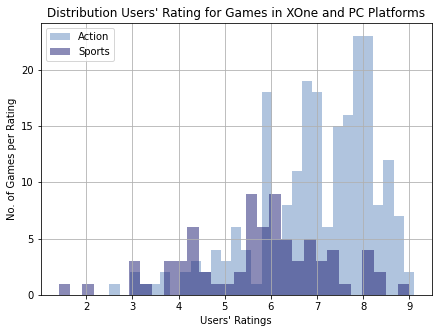


The Statistics of the Users' Rating:


count      mean       std       var
genre                                      
Action   2102  7.031613  1.412527  1.995232
Sports   1319  6.928241  1.602598  2.568320

In [141]:
gen_hypo = games.query('genre == ["Action", "Sports"]')
print("The Distribution of the Users' Ratings:")
plat_hypo.query('genre == "Action"')['user_score'].hist(bins=30, figsize=(7,5), color = "lightsteelblue")
plat_hypo.query('genre == "Sports"')['user_score'].hist(bins=30, figsize=(7,5), alpha=0.5,color = "midnightblue")                                                                                                       
plt.title("Distribution Users' Rating for Games in XOne and PC Platforms")
plt.xlabel("Users' Ratings")
plt.ylabel('No. of Games per Rating')
plt.legend(['Action', 'Sports'])
plt.show()
print()
print("The Statistics of the Users' Rating:")
display(gen_hypo.groupby(['genre'])['user_score'].agg(['count', 'mean', 'std', 'var']))

#### Testing the Genre Hypothsis

In [142]:
Action=gen_hypo[(gen_hypo.genre=='Action')&(gen_hypo.user_score.notna())]['user_score'].to_list()
Sports=gen_hypo[(gen_hypo.genre=='Sports')&(gen_hypo.user_score.notna())]['user_score'].to_list()

I created two lists of the users' ratings of each genre, discarding the null values that remained in the column. 

In [143]:
stat, p = levene(Action, Sports)
p<0.05

True

The Levene test tests for equal variances. Since in the test it is true that the alpha is greater than the p value, in the next step the "equal_var" will be set to "False".

In [144]:
stats.ttest_ind(Action, Sports,equal_var=False)

Ttest_indResult(statistic=1.920763259726578, pvalue=0.05487348317149201)

Above, I tested the statistics of the two lists, the difference between the averages of the two genres is approx. 1.920.

In [145]:
random_ac = sample(Action,200)

random_sp = sample(Sports,200)

alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(random_ac,random_sp)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

print("Action's average Users' ratings is {:.2f}".format(round(sum(Action)/len(Action),2)))
print("Sports's average Users' ratings is {:.2f}".format(round(sum(Sports)/len(Sports),2)))

p-value:  0.1005315482644148
We can't reject the null hypothesis
Action's average Users' ratings is 7.03
Sports's average Users' ratings is 6.93


#### Conclusions of the Genre Hypothsis

I sampled 200 random values from each genre's users' average ratings and set the alpha, the critical statistical significance level, at 0.05 (5%). The p-value is the probability that the null hypothesis is true.
    

If the p-value is greater than the alpha, we can't reject the null hypothesis that there is no difference between the users' ratings generated by the games released in each of the two genres. 

However, if the alpha is greater than the p-value, the null hypothesis is rejected - meaning that we can't determine that there is no difference between the users' ratings generated by the games released in each of the two genres. 
    

**The null hypothesis wasn't rejected - thus, it is possible that there is no difference between the users' ratings generated by the games released in each of the two genres.**

## General Conclusion

In this report we started with a data frame with 16715 rows in 11 columns. 

At first glance, it was visible that there were incorrect data types, a lot of missing values and some incorrect values in the data frame:
 - two columns have incorrect data types - year of release is a float when it should be an int and user score should be a float but it's an object. 
 - The name and genre column have 2 missing values each.
 - The year of release column has 269 values missing.
 - The critic score column, has more than 50% of the values are missing (8578 values).
 - The user score column, has more than 40% of the values are missing (6701 values) and more than 2000 "tbd" values that are distributed across several years (most not recently), these may also be considered null values.
 - The rating column, has more than 40% of the values are missing (6766 values).

**Data Preprocessing** 
In the data preprocessing section, for the eventual purpose of analyzing the data frame, I did the following:
 - The name and genre column had 2 missing values each - these rows were removed.
 - The year of release column had 269 values missing - I filled some of the missing values with the median of the year_of_release column grouped by the games' names. Then, I deleted the remaining rows with missing values.
 - The critic score column, had more than 50% of the values are missing (8578 values) - I filled in the missing values with the median of the critic_score column grouped by name and then grouped by name and genre. In order to not distort the data, I left the rest of the values null.
 - The user score column, had more than 40% of the values are missing (6701 values) - I filled the missing values with the median of the user_score column grouped by the games' names. In order to not distort the data, I left the rest of the values null.
 - The rating column, more than 40% of the values are missing (6766 values) - I filled the missing values with the median of the column grouped by the games' names (assuming that the rating is similar across platforms), the rest of the missing values I filled with "N/A".
 
Then, I check if there are any duplicate rows (after locating one and deleting it previously). There were none. I created two new columns:
 - "total_sales_in_millions" which had the aggregated sales generated by each game in the data frame.
 - "release_decade" displaying one of four decades in which the game was released. 
 
We finished this section with 16566 rows and 13 columns and missing values in two columns. 

**Analysis of the Data**
Once all the preprocessing of the data frame was done, I studied the data:
 - I found that most of the games in the data were released between 2000-2009, actually the number of games that were released in that decade increased by more than 528% than the previous decade.
 
 
 - Found that the most profitable platforms were PS2, X360, PS3, Wii, DS and PS. I explored the amount of games released for each platform, the sales each generated and their general life span.
 
 
 - I concluded that a platform's average life span is approx. 8-10 years, but some platforms defied the odds and either sold for a long period of time or are still around in spite of not being the most profitable platforms, e.g. 2600 and PC. DS was released briefly in 1985 and then re-released in 2004, and was the fourth most profitable of all platforms. On the other hand, we have quite a few platforms that never really took off, like 3DO, GEN, GG, NG, PCFX, SCD, TG16 and WS. Other platforms, like DS, GBA, PS, PS2, XB, 3DS, X360 and PS3, were once highly profitable but now have little to zero sales - especially PS2 which generated the most sales out of all 31 platforms in the data frame.
 
 
 - Then we did an in depth exploration of platforms DS, GBA, PS, PS2, XB, 3DS, PS3, PS4, X360 and XOne - platforms that used to be profitable but now have zero sales, some were highly profitable and have dropped considerably and some are yet to peak. Once studied, I concluded that PS4 and XOne are the platforms that are yet to peak in sales. 
 
 
 - I chose to further explore the data for the years 2011-2016, assuming that they may best assist in drawing conclusions on platforms' potential profitability. We saw that sometimes looks may be deceiving - even though PS3, X360, PS4 and 3DS are the most profitable platforms in our sample period, X360 games generate the highest sales per game, they have the higher 1st quartile, median and 3rd quartile of the three (even though it generated less sales than PS3) - while the games for PS3, the most profitable platform in the sample period, generated the lowest sales per game (out of the top 5 - X360, PS4, XOne, PS3 and WiiU). PS4 has the highest average sales per game, then X360, XOne, PS3, WiiU, 3DS and Wii.
 
 
 - Using the data for the PS4 platform, we studied the correlation between sales and reviews. We found that as the critics' reviews are higher - a game generated higher sales and better reviews from the users. However, no such relationship exists between the games users' reviews and their sales. 
 
 
 - Then we studied 8 games that were sold on 8 platforms or more, the sales they generated and how they differed from platform to platform. We also found that most of the games released in the sample period were Action games and that that genre generated the highest sales. Next are Shooter games, Role Playing and Sports. However, Shooter genre (with the second highest sales generated) has almost three times the average sales of the Action genre, the second highest average of sales was generated by the Platform genre, followed by Sports - while Action is fifth (despite having the most games released and generating the highest sales).
 
 
 - Finally, we compared the three main regions: North America, Europe and Japan, and concluded that North American generates the highest sales, then Europe and Japan. The trends of sales of North America and Europe are fairly similar but Japan beats to a different tune with different trends and gaming culture. We also concluded that ESRB Ratings do not affect sales in all of the regions, especially in Japan. 

**Testing of Hypotheses**
- I examined the distribution of the users' ratings for games released in each platform, XOne and PC. Then, I created a list of the users' ratings for games released in each platform and tested the null hypothesis that there is no difference between the average users' ratings of the XOne platform and and those of PC using a random sample from each list using a 0.05% alpha.
- Next, I examined the distribution of the users' ratings for games released in each genre, Action and Sports. Then, I created a list of the users' ratings for games released in each genre and tested the null hypothesis that there is no difference between the average users' ratings of the Action games and those of the Sports games using a random sample from each list using a 0.05% alpha.

**Final Conclusions**
1. The Platform Hypothesis - the p-value is lower than the alpha. **Thus, the null hypothesis was rejected - there is a difference between the users' ratings of the two platforms.**


2. The Genre Hypothesis - the p-value was higher than the alpha. **Thus, the null hypothesis wasn't rejected - meaning that it is possible that there is no difference between the users' ratings of of the games of the Action genre games and the Sports genre.**